<a href="https://colab.research.google.com/github/leonesso/Credit-Scoring---Fase-1/blob/main/Credit_Scoring_Fase_1_atual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o datasetão
dados = pd.read_csv(r'/content/Base_ScoreCredito_QuantumFinance.csv', delimiter=';')



# Exibir as primeirasss linhas do dataset
print(dados.head())

          id  idade sexo estado_civil         escola  Qte_dependentes  \
0  708082083     45    F       casado      graduacao                3   
1  708083283     58    M     solteiro  ensino fundam                0   
2  708084558     46    M   divorciado      doutorado                3   
3  708085458     34    F     solteiro       mestrado                0   
4  708086958     49    F       casado       mestrado                2   

   tempo_ultimoservico  trabalha    vl_salario_mil  reg_moradia  casa_propria  \
0                   40         1   40,089665024322            3             0   
1                   44         1   66,557645274838            3             0   
2                   35         1   123,68182089138            6             0   
3                   22         1  19,7159343168329            6             0   
4                   36         0                 0            3             1   

   vl_imovel_em_mil  Qte_cartoes  Qte_carros SCORE_CREDITO  
0            

In [ ]:
#dados['vl_salario_mil'] = dados['vl_salario_mil'].str.replace(',', '.').astype('float64').astype('int64')
#dados['SCORE_CREDITO'] = dados['SCORE_CREDITO'].str.replace(',', '.').astype('float64').astype('int64')
dados['id'] = dados['id'].astype('str')
dados['trabalha'] = dados['trabalha'].astype('category')
dados['casa_propria'] = dados['casa_propria'].astype('category')
dados['sexo'] = dados['sexo'].astype('category')
dados['estado_civil'] = dados['estado_civil'].astype('category')
dados['escola'] = dados['escola'].astype('category')


# Informações sobre o dataset
print("Informações sobre o dataset:")
dados_info = dados.info()
print(dados_info)

# Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas das variáveis numéricas:")
dados_describe = dados.describe()
print(dados_describe)

# Verificar valores únicos para variáveis categóricas
print("\nValores únicos para a variável 'sexo':")
valores_unicos_sexo = dados['sexo'].unique()
print(valores_unicos_sexo)

print("\nValores únicos para a variável 'estado_civil':")
valores_unicos_estado_civil = dados['estado_civil'].unique()
print(valores_unicos_estado_civil)

print("\nValores únicos para a variável 'escola':")
valores_unicos_escola = dados['escola'].unique()
print(valores_unicos_escola)

Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10127 non-null  object  
 1   idade                10127 non-null  int64   
 2   sexo                 10127 non-null  category
 3   estado_civil         10127 non-null  category
 4   escola               10127 non-null  category
 5   Qte_dependentes      10127 non-null  int64   
 6   tempo_ultimoservico  10127 non-null  int64   
 7   trabalha             10127 non-null  category
 8   vl_salario_mil       10127 non-null  object  
 9   reg_moradia          10127 non-null  int64   
 10  casa_propria         10127 non-null  category
 11  vl_imovel_em_mil     10127 non-null  int64   
 12  Qte_cartoes          10127 non-null  int64   
 13  Qte_carros           10127 non-null  int64   
 14  SCORE_CREDITO        10127 non-null  obje

In [ ]:
# Média, Mediana e Desvio Padrão para variáveis numéricas
variaveis = ['idade', 'tempo_ultimoservico', 'vl_salario_mil', 'SCORE_CREDITO']

for var in variaveis:
    print(f"\nEstatísticas para a variável '{var}':")
    media = dados[var].mean()
    mediana = dados[var].median()
    desvio_padrao = dados[var].std()

    print(f"Média: {media}")
    print(f"Mediana: {mediana}")
    print(f"Desvio Padrão: {desvio_padrao}")




Estatísticas para a variável 'idade':
Média: 46.32596030413745
Mediana: 46.0
Desvio Padrão: 8.01681403254903

Estatísticas para a variável 'tempo_ultimoservico':
Média: 34.133208255159474
Mediana: 34.0
Desvio Padrão: 8.221427650443347

Estatísticas para a variável 'vl_salario_mil':


TypeError: Could not convert 40,08966502432266,557645274838123,6818208913819,71593431683290182,75269034393815,906503811844818,463941273646124,8128023783198124,48450567686465,226537715440133,4936379394823,40987852416418,94716722361667,4186604744876127,8995107550437,362724589460622,3309172545992105,12156610166421,9083774330898016,082218807225,402330859811890,39426547276,1944319430210066,7532923992396144,19826935668201,51644900679918,0590354015691192,41989412499123,49999288325197,42130538767465,87602258820205,63992268221988,2354891850259,6805221884256,166389159874859,566224966370,540057372492817,7940636517172054,2892724969385,7049183259518,4432212595163119,905777522224122,226596646147,6766037720520,154958665062421,978759822919223,568532238304130,83567543590419,94182870960817,096816425579269,8033539671624105,19923730896138,4288789382264,10902398693420,7704985338952075,017807808986130,86448059783222,9911718067873,5775400488734024,07420172018418,830368081274417,532390371489385,36407927069197,2902664490421,180192170445107,8282614591114,8848170380218,109254678916876,209196387008144,9053905442322,9434562324116117,35443336528821,831072555580917,348594078960273,7214125006721,238836237788464,64706914174820,31733410475183,985450303218,691827431097623,083993367164880,674809326958140,74120484954119,926834584720,22522630928892,4800007689712174,428530158619,71704986059662,039616866893418,511200596784108,150727904491131,43810825624,1098506297195,18030434848130,5167827014900125,58449138081619,275503065275622,6828975340205196,30536328052085,832757996320,3783611943124101,3305845105823,000393072835427,071341346720,1447493290636017,0248721428182207,034629348184021,0552650984201126,2543420871270,09606281615127,563117494424,02196263438424,726426791594422,178653253755262,35058230699222,6204745334624066,4863307055766127,8013508391619,17770001232531,697153960841618,515359228665639,57241704661223,46767612750422,11760490545865,43478911715234,914085139802059,46844099851622,7714924214102,41131688430763,160039618452021,92927707234817,089212861194568,90176004418,6082720610688100,4766732950416,992337425734167,6802389107222,752744982755823,900316619608133,1634683821177,87367774782136,63438140044100,0202213025618,20344765824018,59954935248113,4468134843,8746732237723,055651884865621,5203741859736123,0475010156131,85280278025787,3778603435243,7606711218992127,07244730502427,59191602854424,237849115593102,23195353308197,33499864478470,36267848484872,13671658644144,91131212571200,738764603023102,19016752377620,581846741298420,21738146848101,55172125513290,4686911325621,623919168733232,455958190466,286574076844868,563784035676,461228233704184,57076115478109,57047470798867,3364164347203,673636843622,795453800319218,3533874073244,6275675032119,61271514462,0647891416021,37850705667620,67454805558760120,696849840090,039378051269,144971745312129,65372670681114,735136114710024,587466157254115,8111014453670,307105796201323,9110972909224,254621728322465,501394148099435,765224187631892,7215561929868,93308931265124,331094778822,40488368904320183,35667674478101,5629470716121,1776619152486,568907075622467,48100792269217,45712255615960,3615599202100,194873269491,0667264927717,81617652133621,831082384153102,848744661282145,11247044861688,2658878235816,48281070792218,2463151783595,33138130272669,13193404376069,642921924108023,208886974873698,76507088896170,89347985339186,90634022117520,805294533757386,99042081992522,4574704883348121,11441845016824,04829824859540064,19127936161020122,7843293087100,822729082423,127729593245289,510663558419,4276988635646023,7819466862,94239976528103,35397032675134,30322080808122,438563417861,2950876538117,78752623612104,988463405056099,6462872482133,655698807217,867694691209672,92475302279419,1094860620431065,028785493319219,05872801817620,034437703350471,193104205026418,700445599430428,0541322908141,764599592092216,9250546148422,012851244065420,6999241480235060,445657824552095,452227360103,7914904515919,961984994786192,3654179315133,8432349829422,278586387217,873054966714995,1312267835239,34497919060819,185835076400321,671264006130222,076158578969662,975386139328105,50286389314818,873389902588266,84922802791817,508677767812176,575537861865,259133573298,3435751235287,4109495695565,3924028941568121,8153126704872,139384753290668,154208700748021,0100166902944132,843364455689,019885951942130,136515846134099,4216946965223,7093759822216146,54371491331118,5728421178871,559643902028868,1751749021462137,2745669495268,275489388758122,3278212528179020,3130517014178,664755567574125,4001154467220,391349405517,75198966679060090,963873550219,985105328082619,581219506764826,21294540871,319663613056663,3006868298706116,06999340588062,795395634286124,79380788648020,32412283104124,033352835106,0000561387424,235573277095794,25649692791522,62220869424575,673738288164198,04364811894,5438257782818,086135794069217,727738841176124,824622257922,093593279033668,8456913973674132,43516861598,15716768356136,557663186872186,923061686189168,5391543836468,8544481288283115,6075725595269,8615656679808106,24450378185124,3959591258144,2723250711699,8153627633618,79707766608133,64075093122,792504245246107,97367895552119,54353913090416,051278208464102,204684771077017,87193443485823,824522330720886,2345104900478,30629762423,277625602093620,4377017132922195,4707021844522,645301904225130,909252438160204,8630041085172,73675322484204,226922816541123,05513749598,4873103579400199,40736807392103,54141290157033,945359574647421,58155009959,3948026644619,693588719726131,79898980934462,685904623912621,8071839138174124,40910068158192,8595899696462,88527795074922,333750910603663,74680947087220,924366317765270,841967704490,735295800078499,5105076541819,1533766592024115,80723810968146,33865995056190,76357086222,2862919328504126,821246018464,121143974498,09572158477124,398943536106,954841611823,393932614835217,7097289553304139,24238681493127,1727051764416,633218187863419,245537780084121,28724312120,16867454396113,478640008339,8942721897638189,76486766384220,88453702487823,837628447360158,8770566199869,765174494140322,242922605666123,56924191771106,055851535,9025990502328,4014722297672,49679475517,36105625114144,36169696088101,33211758145111,82268704038420,5355406887436137,4444343616422,04096401296129,41769670875089,3937600659417,19375916494620,867074349121205,6029594688167,7254378653252133,4241758432520108,1570460946870,008581128958471,067634155166323,6240666501463,434530983938419,176403758595222,249812852109418,549444331772672,10983485244220,973969775104,3070879674774,414063865239389,64866665048132,50425252041619,30879439445623,534658580837919,58380387521624,368235844155824,561993825624,87273892646488,8162201623221,038320710808821,55830129520244,052885904203199,650869323850018,0483754538412126,53631891631516,3480318283858196,7263250857586,6495344624151,78008748821118,27717845859518,2885722498433120,68787572362490,63666998786418,52526825688100,2288841881668,9955884162688132,92065458639186,4218053427897,724635986022,612827045141136,477629158425,4447371252088159,4600610803268,6816867359217,379430801847488,5778380825617,25632010086464,46695671956116,9531218684496,134451663640,95429913177291,22899436236891,74340630572914,543862168192,3803091166430070,0938127114176101,7746312232023,60463163159524,660514066567,0905928434692,606954427416,50014719483888,67143915176125,40062034734115,28935529018,2931491928619,3899478464017,649178695425363,436622766865961,4109433305622,7612978875887,696283646419218,765585773883133,5051805760100,73315381947132,65700644592120,140353519296,38740165149114,58869429176120,61946077372898,73023951277128,60044601382108,77336311091135,13976485732823,046016200514318,44039153252464,8767707786863,2227295476874,7700895547665,17545532848071,337423741407423,1841746659650090,7683998409100,1823855986825,5442214466367,674694912239,915851808834531,712160607828775,29982870103222,5304035970041136,73307849912196,66717592385525,12087945551360184,216373523103,71786604317664,12752878907665,52049093744127,60637347518,796741534857173,7183539515398,84424835068114,20676501168125,732303729088202,475576212092115,59728277733821,997039075222,875016148726472,04041187101129,13823714178,876137524615290,13772268965,825396724418105,66493829918498,05445803540828,3417010852791124,01957554253499,25621649685017,802223915305623,296043312701119,347681936571836,9118840881082017,697615114672193,73862427044868,8038514291253185,61808577079620,414618524449397,8000077457025,365142583641185,6900160581520,0329790532480069,05539270713318,112427948815255,4925774956872,48469050108102,36033933125113,253540353969115,84236729599819,948741937006488,68461475402201,03990977208101,2137076703467,02031355877119,83526741208118,63256571784622,737948670934620,7256923223904120,99373771632114,69269775679,685142330726787,23167043448146,636052942136,451527310495203,77319965618158,3173954252867,692048750468,91005120734820,796351121416103,790453425419,748664022626125,603928735208101,7160740414060,827803699624,281465679149472,1359669764818,449118182615475,258253151808521,4642194663659,92045095672592,6943071009496,14391190399,54472881521019,7754915451392021,7915498472424103,57581647664718,108040074544818,65706316596127,0675672328420,5259448188928128,90948078568191,6566425333119,3361528387428,0101132552864224,406816989579018,849508369866769,081482546419219,23088467260120,356857329524822,188794104138861,558729311926177,76423004687620,28503185790418,104781737217628,48306783334418,748675369353658,8671221710587098,22881621192140,1779202523884,940438840423,78263666716195,64639944042226,447526442656131,96098619658199,37926840625299,138787075819,9689345227196101,00852869203114,6991893967216,49278653566021,954947636962287,6073024278163,321948489698,399883512718,67481054875871,6286312756084126,85221525585023,9625499568118055,6702406729,672005399276819,6989609625224,138560371279267,8341530515671,97219703092636,99666751116134,298480205918,15856440770466,5686425081616,4651492352564184,90180303362394,33407933653121,19306819085920,834560822093236,7231911041767,4644093853423,178774280289,3724879287669,987945228449221,8947585516692093,7667944162821,926734489759427,784845802110663,108276548220226,0872456796892,2334940111968,3986202732628212,32977970619699,089851817216197,1463166419,00762805634101,527766974821,926260312473624,000666598031822,946777936399317,2642354617618,509542074784871,5794563458867,271210890147235,1261259559028108,73619275194195,09397242048140,43177798969673,043929688418,0876688701852124,443782850865,9194586348448076,251339062870421,415604819184135,3925603816185,76978698386133,786027363976,5023434591859,466553868506817,8469796576694123,787836647718,289690241932895,42911310352129,818069160671,714261345780194,195867693294,3172924612192,383805656118,49809794504459,8519218474918,360678122744418,041320676871132,186404318150125,6399691451223,6560118098363127,098402107586109,80411588922,590733858492822,457782583834464,192316580105021,6541457522208113,3683435597563,74719608631104,7421605334370130,55547334821396,3409938498105,27267945841996,42918315621,57905607639693,900558854170,66726661055598,33199732622,96713854812320108,2826756636800208,68005037256100,8625273447523,20031508543022,024739034813619,342657183430416,2907924138218069,25594838526201,0950737171221,900876010196462,312123973905515,3673223209819,350125580998460,41734599624126,892133958181,80015718627880,5460846572823,568369508054822,392342588470440,570275263349116,218218392973129,47118697375073,938218875315223,3800461119693127,59429738764127,2154650624193,710068459397230,13062787268123,3998697855880104,199923339219,425195552952821,61353788060418,083088270525617,6911661427379017,18094129343275,403555132713616,2973369179139,4680251602494,1684426343100,8233574137421,872468911378823,016102000664175,687521988355275,534132691218,4739086737417101,228174201616018,469815342643671,1350126697622,6182283123104177,830027077822,851344008653166,81258312326,1336135496859,2551331391763,203594938536135,4734022714875,113323207916821,501553119472017,041424753175623,9717020704096100,32826759478123,41200397526130,7914977815666,767229392895102,14680278939522,5150260428821,132003855045663,42040991778131,4025737089860,8532215104817,2166448166752124,47054892186273,21870601464822,42175358660840113,70888884088102,25854250076870,60586269134750127,75657620854522,52521385469619,84327630787567,629176889221,06183969163560191,80906215328126,410461530656114,20600672881415,321107888627220,923541203257418,769535296023671,1508936810617143,65519384248199,433835339222,615747789549221,478989563161273,460253960830917,581095353257856,04031848924064,7398965608472127,7870439849321,488300508211224,35093031334460,98455441962132,00028550016022,46480792877691,80297296784162,561332848224,104855796667222,034730250972817,677606965948419,54011830806827,940167361411265,92612495795274,001733402062175,849124852464103,72748334708102,434932118418,429600897953317,253929646892560,9207162782468,1350253102605091,72148329422127,6577493445862,35942710408662,5656982216143,0566967024100,046087579290,081319170167196,78693722650469,8005978835265,63094359427,0750177370416,07046702284818,338197843460521,466721988981187,06797627478519,8487894622465,1105161396928203,4152322184183,005683271129114,982733828869,646236003558133,186546810824,4111036334112133,8399889175117,0800485247490,19050262576918,79566008582419,476087659857976,9114738233024105,7242410172186,21243452477218,3251484091822134,59957713285666,9947561490989,0147582438103,40284363656124,32685780283,2035727577669,264996990971,8636415818223177,0944464437490,2842964688112,114228168522,645991596869020,93483631456131,2654365859217,889660317339218,412033739436,91531579507223,784431850933862,953924779920,3569932534921,023615024294426,487064446024130,70591518733109,9359932535267,3642886227272189,6251447001628,7021454275664134,2628869171568,267036138162484,8015786192422,809547031097694,304940539040109,852443905161,177691542968125,6972969289624,766387032816131,4380273010724,0302289186512100,7803263129675,1271037621121,298673553220,772461004388822,161935995681283,7639140463374,820508295033716,960607003823617,7479346744468120,2610959577365,6179805152872103,12242645322824,30305055320418,695038716567462,41995229896103,5744150448827,9224001499356131,686312893239,6397943434817,580058533916875,3842054130048115,2358988500861,73820624823619,845659463638420,0035119616,81984422105197,774792008229,9101781859984131,51449985268099,8704335694818,430290775313388,216036247662,8790372797224129,715692354112130,4816257203295,532540578848114,3160023205257,49496576865322,561368912618,9011498250432096,50764807632133,7805613716130,9865071794317,4593736912528198,874321746864041,605622273943468,7248105347217,405863559282922,6496626921822,9277691626688018,76066193232024,061356756082823,495383682496133,5177999456821,894967479415795,1382150611223,828684328500469,963989435385621,12757580934121,3090536264621,7202117388432100,18083181004138,27260717570,85475040446104,56462673246150,8343845944816,3103194638720102,043108975516,8913346899392100,561926775152,88008234498155,826721398790722,17537956257220,718563881824127,368866122054129,334052066755,8722990603613,4327236411967136,7868974382133,60135679744125,82245511339,12058805220129,5721104395462,0222267022140,994346303271,925195677194822,53419036694018,8728603687299,6743484483567,13425881428065,2961465114718,246670807812723,3856011028001196,81724749815184,984496923522174,459146911577,346812743221,0632799225576127,055594768924,150368966419,8205377796823,82840781060992,75536399605151,396992513924,27385018705524,3426389607985,56576457156019,68534319752164,343927541815177,6642328429668,38902913478426,6262444189131,16379809117255,77785107708264,61084568159182,37660380928659,5586094363121,51318331409494,398254852570133,91072748997,1557254653269,089995309203595,36271093284221,9383880413184176,19211080549676,20760258464622,170449247181222,787315512794193,97730068423,4765463091544123,615402263040127,391134497321,2823325687519,691986538460,07437837147619,00882905064899,85912331490974,12152036877555,4712815120386113,87193346387223,4303628677617,7528073633668151,9446095155323,03644610098823,3882281923948117,09321608147817,014689017623,953610441304130,60872026496185,05730028962975,755029616555592,074917390418,236453527996818,00786742653690,1432053442822,6900416737568127,156444103520135,8906394311793,82941918130,9481427236495,1878141676137,14833999929618,905655192673098,2005108836125,72687812322459,5168489921524,425674342091466,17360917595620118,4957607078182,74084650815718,662476457001658,51314480023040141,14395735847723,917183577931132,7547033553149,71746273784100,68060045412021,612616151841104,06679590208091,1300089156699,998048866565,151479789015118,8093943050495,3511384528117,72594952584697,069199900457,1312928823680,85341238975128,32128453296202,535110946483072,127646359294,11312834869419,15731326579921,2857598521298129,937561748950136,352833966440123,81581033365623,00264672089519,4088803000465,02800194940183,15067119119483,0598644759420,81950451716892,4485659422616,751431791698116,8176596069721,15753430298465,9362647227490,53348841620,827356536042491,6318248155794,36979364306020,73754198989130,709140600521,5062353704772151,37427344676132,8112252658821,0364744837519,94292034471824,601162837838475,0775982998892,20548522931285,0928909874984114,8418922875208,5991848373720128,6881332718367,01841939280917,6662265511522233,2050295494471,7727975080192142,139016379223,434180799388571,4839472262644107,771065270968192,34224219616063,864354741120,1553098565524,95649655787220187,496222058015121,567804572991023,0145134588208139,37872823925117,42811435951423,811103874516422,0704836993155223,14036327172222,992911008254720,051061124382425,225848241401664,30868504002818,432265386074466,95334034132894,0522141278323,83374704544128,83503853728130,97455194395073,7673257351088148,53430317250823,524270506336689,2283800713324,67218522565870,356828854138656,10857209908129,72130529184199,86594508018219,61933066100969,2464727462976198,1481780627126,137128561522,63707425591640017,756059387067423,092532902897,263464222936176,2632056784687,0186398917,063811644937621,45730599306146,9925103363217,6517282307517,38334269843221,28091013576122,353136367141,2224287162096,76403081496143,2113578880695,9465385321316,65913468584194,1731339262071,2772899608141,72286822180420,444405884389568,6007666581382121,02501322384105,756201190128145,3955372814128,7032372719518,545096943136259,83400672014124,2982859218166,337856684914588,3401054063150,30562421718219,17798560027974,8061232487820,390939646163268,1718367291222,1526473334938,03785131781840,579921184140822,227119886160867,6527277888107,6052179548916,76887590375921,12546964100160100,342220698254,846745626584127,39143586848120,9853390147521,609534531686427,73712338113622,9173123102123,212823948673,058734721016133,4696443731221,89597835889819,2999399430518194,34297486324625,65112476197723,340797312277656,3171461802477,30451435405642,695361875462491,69763213010422,570259138841622,092176810817099,86073120332202,72469345642180,63321875438862,34401607984117,405903170620,193583754296386,93175573182222,068871661188815,64248910694474,598586583459489,27635909561216,81298595548498,578143000015117,0702579315519,927359668764816,0167569311221,72375509775918,488620773841722,287846989553366,970471648938021,9896722960236,166814850839421,303781174632697,65838338971123,0903877235418,475856341704671,60620056916557,65722146548140,50482012748869,0040700146860,222467093712199,73871885566495,60709516129263,26717915448131,307915367294,929412669440100,80300507435113,467779216421,9763024398086121,0819494308216,171260708389891,46514952566116,8344930461876,930771928421,9832561048214184,70356177787866,82578912743421,13157972616100,6773208361272,088289445888070,98768213917,23203568627222,5258984382489117,81592860707617,6954489461823,850572589100859,5739311041661,974212235927126,650604229632136,017801223223,0745195427212120,9714016751758,381985490519698,429884503622,07381724906181,6365842262421,51956717489954,2386202715200,26325371225422,145967827524886,902654056388823,34872519189,84377192202,77907100562135,09846177854476,69849942855817,44056266904023,148191647209627,751408308358220,9442211694577100,5872354572895,8490587705545122,4317134704517,114014113424865,869700243174,26100312176016,763650681612819,746645167583023,8977899945488,7473169668897,6264849517118,06408438764269,3894044957422,075281284986878,38902854604596,4797524277571,724261903336131,39299960351560,73872378012070,289132619456016,9987084809422102,476810667328018,965393701699217,110532808096195,08417966692821,679658786188824,213498919930131,855030534974267,865680666218218,145119176540477,02623020472,1504722898013095,983685490172,1216267648101,603840191717,938868676352131,586649513222,63620497283138,851434227233123,4028935167677,28127509168124,0305800034468,49815315173517,190015001027271,391648920201360,5774164514491,63991575176917,706031303493274,5604178188898,39378920176126,341523638745021,625513521696108,58085926065116,08525278922,8467109771216166,2433519045697,95391092663,8785189139183165,8657711581216,492692441619,309429867369239,6137439734508101,347523412818,952602059196519,148237966563296,12091409427,044887059461795,70840832275123,079098552628133,7005683360131,8361321142118,198958330423,1104061632044021,500728915532492,77530172932194,5970345457620,027715835576569,4096620413719,71058635234018,1986194132496025,101108812894425,3904944311228156,0328589463097,1028460916866,377841583922,5083996463615140,67408962224882,64075964779222,67061120136123,550453079830618,324493787892618,08763079780822,6949242905103,834069402893,408384449720,309643006566421,0424354367088094,2872420522767,9065134803292,502700473456133,91305976896102,76197956376129,993448512224,852783366673959,51052039276161,77846161516162,56109729659,499831855618111,74542373622673,42414964842460074,7927890923269,73172381995277,920138990378400131,20507951223,6176122686473,4204064779328116,6223447922491,14058952720,2095553870224136,493705106922,575347684812819,235214957622,71574328232616,696837208803522,64284361824838,5667598272326103,481828944857104,019046465897,0062948311660,436521378792123,0104711923528,5796977893028071,294374766511124,00196834602570,1740642806996100,3905864303325,951138065216104,48444264690493,410782179107,21532675762,73429670696137,8576484190670,059924509673621,025512625521622,848140257813265,1054853160621,7420116618336114,56977540026017,34496617369617,2335656214918129,099434200822,7160135055222,83231937863699,8198399118,4846793272512023,52363648835221,9737226174781103,6314402759884,0772109728475,1608414715584131,11555086070,5531936376818,501862233267111,28424855837528,8400172115617,47871267096217,52155711236926,666308820073616,9357940980896,7298300260222,153989901925324,461162453869419,0572731923392021,9157719974876198,1155780119665,969185976928108,226334334322,65043110673277,4587552918466,48234589374132,65108507717,31103036891861,074236653075196,6460471833619,641796868756419,834667450341987,2377796275988,349134489918,179441770417219,806179106672102,09172155103,13791215004872,4063380118474,00438325126196,274276275130,6657283437895,4333501782425,25831195650719,543236633634672,05887488744202,069018334423,519075046454271,13234525616823,467473174124114,81951223657221,3024634765452112,7503942010664,6367782753267,805805198650419,088533427731268,8241847658747124,3539626757090,503542499795,713003217116827,019505538158423,01566315808133,1787778774475,214360173100,53465791474,6157183446400100,9638590340473,6475788084344101,6697981365116,50775656948824,359412203808112,761264002441,55788632426296,2408704943417,576372162606421,98472186112114,11240494586,8560275721629,441760634836592,756388092659271,794613259598123,6411992511736066,3307581754894,784618673297,5382176502522,262609822929992,8847113088126,74155837295,2515125962436,9152265374424138,3795921386923,436875600522497,3739647795269,022258614102,04225952353618,1220866054249121,57232069268130,69266184894,372494283496188,42799181392220,53856274996620,585398317691218,0964301558420,528308798823,74204954355922,12720226650817,8993952991168112,9981710916819,084222967397158,65496029338490,23647909701018,27771298155114,40524448294488,70787203163623,691880366656129,23590236336098,3376466208103,4180360555123,47386025097727,419333190364872,887041126548104,0871876943360129,23810656596021,0637143713412097,42509262929621,165494548117921,93688935572640197,70593862958418,91263678376830,0704310878476,6712729469984155,57260816128185,69215127127132,6076154759819,259048870505618,302339874218425,011412876379219,005034832104,080099359622,542441558542623,8021939533699,80916427998144,50027462496019,384282413441136,05025306131139,39558723053663,5027011876874,974440185272387,769424557123219,505104264820,059327665879415,726202944259788,134057965538190,98809232567423,0699776340484132,513622263750114,0390186966471,66869743465120,45563433969,17465280115116,8741295076640208,209051778883,12413432723,849804606920723,14128398481918,7945704777665,2261856918173,273451303851220,688122400105621,6011154526656130,2698439098516,1450764239696,15243797588108,36315197442118,08503814623394,3932476313623,2345108318416066,330555484272,331129845684621,856369112605996,71772722422,157621017689643,955422481225620,51355788050817,321070202491868,16017875524142,253000513423,96194601344523,0596103306765,34523385399118,719305484229168,599917543917870,732233969120,1159006807977101,511801616,64042624998123,6869482843885,783366504404120,129605612857,41954016587,549083687066492,41244511754522,2333720810739119,0303233996868,0760894177100,018231709927,221168794585190,77710671893126,147524728468,46092448384160,876076257195,820223049180,105116955764100,4711719440919,5801264682135,510224686521,9799147115646123,75126685977661,048286198312822,30843486542785,5855644670196,96382223696,48496602528186,4101179086275,6705540062394,61488891185824,571406311630220,53557516976277,1194103264102,09531960518867,2530177983144126,7693324671417,158403325492097,5423853918869,6592667258128,438316421222,6240311176064102,960718745621,676824282624,335748662423,43263087815218,89159734319760123,0481838617521,584202863898129,465862314667,0254539409110,10005795624987,858227534491,160825044821,3427592520912134,1732757032137,6435393471659,60405133792205,08564081507517,186231171491219,080622604041225,539791797014125,8374320296130,3442561344061,572382250274130,32424820274102,1724728417618,165306552047720,899916601177623,935252037196203,665627822545118,7612370558668,681722893084134,2569197815567,34390186563217,6700537246628,09687792566,8139377414420,508309281134823,347351038554423,528080700863220,026504318635424,166180955094111,5499355128920,842326244579216,0840113889687131,5218194356519,68264741055224,22028580663671,0563613580630117,9971515992197,980530058406133,710609399520,72613382702519,55999785357817,124497425728107,94146305928137,21583351636264,529824004209222,5747014558976022,445067824640128,2416463742797,2155717744464,351278483597218,8270767546992146,0771555374817,5650752693556133,0687587309595,221179962821,0703099399152110,64366973374482,5937021338129,00680639351619,819642010784128,7668861794826,666112139653898,463596247205273,267704467240498,16892119216126,4368570743273,023927170796135,97437343072836,637957892097629,315864857041816,929058534486,6838902199389,0237441117,1952781750784019,5590227730112124,467856455688196,2440890254187,698250323712214,1865403342824,516875053363190,737793091134,9916729850571,57522047795218,648461132199471,1483161657376021,845347957162841,809597300269558,561527477024121,758555904115025,347041650402658,513574033978134,369583294322,169691245727621,3219358487856133,86349145964111,8811151417596,752285702072114,873513755181,51072020642,4002223327248116,8582754573230127,85015391220866,04570806598170072,375285686025698,956471637120,945551625944817,34654519230420,05046763501620,76142016163619,6561263016488111,71442514089624,5090688911376128,283234602418,3161554739120,892414412274420,021917826432763,9905266232490,161929149699,28505918481920,96586297994818,386618003395297,080111814422,526890155499269,69890274547223,640928778644722,84317372357968,9703207780787197,83110068075265,790078550365322,73205339796554,7076187709862,535643166271624,0161355794448203,8285834374537,2482803351277096,7187487457423,087029945190421,3222881901926134,1754797299659,02532736550893,1802443261181,726306249816,5571294689102,73365757626483,70369385008184,946313085865,342082616965121,704758671968130,51988092617120,7405992019566,48173236996618,257083184016106,4085811374198,024296764596,8980675048992185,26152347449940,957799500820,3498828398656018,642526116871822,0104412572071190,81685544534939,9529753812515,642469080856820,794101839488820,948966238414523,9854197287016155,39147139622,42721544688889,649461229992111,08336534418,09159478484424,1288145799883118,29110632172121,30775045727465,9190398328112,77314566788120,8238890016846214,010476959970,850826424476120,5008232774468,147375190062469,95155970265694,7282977008196,7735607502519,0650044236526,2304301704448123,39892773116,9415471730922,2736266350988018,574278970236066,1406443499712112,84806579370618,948877817839220,68608900758419,291529883622,314546979614221,076134612966720,870603113122106,794473195052195,2467577699177,3156016421870,26142338952221,769002950385617,54661894623518,060047319492123,459794523619,811150265984119,30314608216021,77838391345820,047943220985718,7540848562032125,0323968270223,5527738801696163,427067595861115,5391111680110,254878870407022,03994302670160117,83652180057136,5904404288131,3713267944108,47775384636872,8025243373428101,1490499278159,2464026931265,746505282494,53539938688186,36197063397889,16183584193619,699137743616130,7440019412135,514721860672136,35694858721321,563470881295283,62716756522696,3271625971223,26884722150420,17450632963319,210417562649617,890278363799217,0623337939273,6941500607138133,5840808248205,189102977021,3955303241156097,8732811929684,6047454304068020,1866596586928097,340044154421,919441838477131,635118680597101,24146641924,7895852484288020,509069249536134,5420124887323,084257867434618,1744316863956137,03765846223421,94600601935680125,045134796296019,7386279812136,6745234317219,748534073365399,2754302803215,75163256524274,17052002132186,53945774477288,0393733492148,4436154071871,392733345559663,606844408715191,20245624183148,198230028819,819669942578217,187915975238816,94813200354323,33905681153299,555026074392145,59158651268069,554669747472116,38542456135090,47055907761617,118727967577694,0423841402760166,573993983818,712948467559419,1735327740506029,05555836162266,9913073740820,5308328335188191,08043304388588,94168201187145,26439675176114,83517292212136,79639804754196,76814664171320,247225436592184,64542704736785,6469477016127,3867654173423,1416873099244218,7532334595221,481089683406522,5293478592121015,59046226119,53171497503278,14898791884870,373992782909692,48788564135286,8368315771138,5867384801924,210891102781519,315894934368857,8091992515196,488961076872135,2858123803296,342757711275,049336192652628,9220776742421,639846501119,01871543584023,9046424045283,161956560860,629652377280185,58936692751623,236251583078855,696244173879718,07557383915471,530679289538661,6692937224201,68950434683159,21754034548123,438700719763114,67591671456132,6718231397,57719213396136,86574442112129,04190463129,81368617430472,741932113641186,8451016251250191,15357030758,12527022125422,274895985196492,31763265836818,5384049014628142,3373748352130,98726364344018,644136322072872,496267786821,86134424064111,808730467584122,2301606994619,114868543734898,825533252906105,1395298496423,126505929049694,5029133262119,4264476492821,6127787964286130,6206653949761,60014483039190,0587412645962,332497829881674,005819280718,9840449614262126,8135791285064,1645553270417,803129398926420,462680643862621,3171157748214181,318660669944122,9403946912419,01864432021421,469841521299465,25451443708104,8732088944821,9603688808275023,093258234406497,94893459478417,4412396171728141,970728111225101,803866228173,48137490912116,13192062984439,001291923628818,2157600530664181,8577540851517,793766109185997,3649197867567,103412807422418,188832672434921,1265856008064066,050642751665066,4201582862076130,48104091004827,937007387890187,2662916602018,930114735667221,510287708342419,274329131190298,120761644582,369172235120,083756949619,002615191920818,060948161256018,686900388499216,58451126958219,0145876173291,3925188654724,15485960876169,940785559772416,3750904516136096,2815411709687,94955258044216,3608175340366199,23259857163462,8767428532725143,62237501217218,489474028644134,66770691686418,8742213223222,70229153885023,194575389227221,938657278804818,779220724812073,33225656592194,046874144017,4303754318104182,2564904960861,845902251200520,0004488476824,387501359894424,741698807404819,378560448360321,34404205533617,617829282592188,29665205750123,6353981514422,7526796761655088,7619340127617,0197930180872104,173865171220,639672919163260,161979776932863,74349156384108,92111380567289,4739168534576,12845194379681,2761647874222,74286787880590187,7112948175221,968987265792130,2922598455523,448634155555139,416744420618,4291089288768126,81950893035149,125096334865,2857402819888134,7528029751025,87796626768817,9911978420278023,9517732987086,59246167784817,465923197124673,9807376702772101,574093878424,881730960517219,133328793624,545823843930517,772637573047623,192242052095128,51479087785133,01836902464106,41057725256,27273991048133,713695193750131,047452466522,047011194752119,34462761786692,0086684522521,342969804130,57103795127132,8701040986217,115099219600518,342925495963266,754186931726385,8733823569518,115714003539,9840963604266,48817719544027,020362662273669,982870949492497,2408905141172,162810938750419,069275352921227,2023998730252115,97684882838120,7679405118489,1381345980827,98929360529596,3906632360159,79784259432676,34104540376194,235753876123,171443085565619,0390832996364108,3851197555266,18872463487616,6927321072512218,71647340220,482421731008768,370969776356816,962614276185223,55310692273619,3799274444828154,1676916896699,85114400175,053395217064622,0290189521259100,8713432276824,350298651993668,7496911901257130,50198829888,3808481495816,7646244077216125,712797817673,7198342731422118,3103147674823,070415981618892,62485729804221,7089440128898,8037323696824,57897156997920172,96600939569921,113337499872,0388841118072124,7377321422490,58184035670,474361856847220,16004983724823,453660468810962,7054828141456020,553027247872104,91291980686471,9952380503294,30731998503223,509944762998466,59976405456065,13732444999619,248094463982819,33550170409625,3660383887420,052234135398424,102679036517687,1357387829143,47390080813417,6850132615195,9025995124575,100526867817,872270371144198,060347550119,8636818552201,56896995123222,27697633372419,913491721877666,673866428769660,69332477664134,30477038597111,54134782752022,411178395361324,7750360621546147,35201233331142,438989024191,74401704812122,11852043221323,6423983706421,314371321501263,1074726482219,469268007161655,33570491813210,982781116820,1832404177613,718320724221168,509851567471617,04639196857618,154469390366469,541051534732827,16839173309461,98077612093298,44342357408130,8672581842815,927933216197,08005191502217,9529967205418,7674318963936101,9233121600471,49630419474474,34053751585121,836142270080197,3871088394420,05846636424495,20266729867147,2185237524874,6822144023032131,19798532335192,64446812380118,4362793314899,28925934750016,961231840837869,983521062521,30280677604818,9764471467968200,2841384138434,090927378358423,799826584441670,19604113678850025,448079631825277,8516720066821,3927125898379132,9811303682421,174802104038425,786843727749600106,638950427606129,14677443888024,122837132381363,390073689135694,203288832218,569116582262474,931690452889617,378837994960100,9931340083622,85922335814653,62095270470465,6366343217992117,4631166973627,1599260676744115,42871489533263,78845225648101,7416852706474,051430717844816,24883252641340126,84225563766464,42943536837521,086062680093688,45281395216113,3273340566457,45642653366022,983639561403286,8676783576188,35796797253112,6309316378422,92678416239872,398836592852400109,941480657864069,054060794060452,474228707688,6306727732424,656929997742189,4090342144192,1412805523219,5239202238944133,40826582137622,173214194621,838179639081322,33732152670265,3612251598,30549232198100,40475284229664,153727819218462,3215421886422,272773604406820,586738537103223,19737072950080122,6839163396131,344992908428,210979129112106,930465644534204,91891405629193,02380169948139,5827316021672,798199526592126,939361368620,15322016939268,802949030510866,5501202883889,6806319164132,2080210357293,5763720724894,026469016832130,03580616741622,793180763626366,9641033687,4063795718425,96212093398434,62621496389958,78970668896,841394415693,89846266766820,9604635890339104,4276588832495,795312207422,100034182706593,148777318932,293237422045666,897444560434265,857535767821615,6663755430128,3772513508884,6983168564194,086834036973169,75732842664527,442023478450319,74465689785274,08703171394100,0544000970819,373762602355420,162310097129220,490090863458820,35633650065471,257834804784760,0467961805820,404498174903937,28255100649221,194713316892717,27730366652823,837047279525316,73300417267221,000951669060102,907553349668,80486833792084,966016299142,48867703016190,24180510529199,79280838989018,63975709918740116,193339691265,35687599732421,4018692270276017,32294044323788,21195173218325,42633285363780131,04294346284022,220197393939223,462528259128468,052941184616813,55468334276024,7099810471307184,983908439102,4728116962565,3494908814588,05396075255071,703705753245596,858465419119,140432935855466,746092396536132,21916329408128,531396804877,205034834848134,81358560300422,45176317264418,326347453629667,81693921201817,6078100520512119,36252357666127,294887006532203,12059665784696,48519784416067,431596307810103,15728699168136,3722702825622,4898667128432138,2846926094217,351888718650498,03511915973621,9209680083471,74156051969222,5094422531264069,7885987816519,40146482951115,48281199575618,544416594668299,5391499926643,528328372476421,0812013308808189,74578013536757,226983818466,6823147038421,0596685318144124,2246525953198,5016650526127,6196810054420,0510366199106,2884692790464,833759810082621,54201465710722,5423508575635,694223098142100,0440177206455,098941928156115,3913618388115,176913351520,614485578824820,03297039589658,90919548227239,347103025876822,20409626399919,916368788121223,579200447239463,48726946161693,0941816889390,458864294461,4782763688661,88561179208124,777613937923,5114773609288,2964850490862,3424002166667,456354514189317,9840202555888124,1677012820,03386889145690,456546076416020,349755366569266,533186922345017,1624892386605200,70076505535195,4825559929622,319916721838418,87093341179293,40919081457621,22457557248127,663711022768190,3140946792817,4417472289652133,960458805820,67579397785617,8580006573748133,294096981760094,6521925545417,5388256110736067,529779894268,5131061635193,37658035876922,2148534203554066,6876294739220,34352826589621,464794422489692,70353608797842,3741415526423,837874650553698,09671079554522,662226828867,0364611842111,33194575744868,8461521747664018,9103893888214,407265863175101,46561612450017,729803624779066,040611966417,946279990144106,21267107288105,71981201917227,27028783497635,2078040376391,898836179616,43186259338424,535108114035618,9064342866168137,58870145671108,078905463525133,10715503196108,78172882435224,020546023296105,49106443614466,42622218232123,285161399422,548034088729361,41598271071266,3703988054418,300434812833622,989636256083818,179607010429417,854455885504100,6855566688419,1177754195621,581750539195995,412578077180113,8582169554562,71587737707518,6305343844536109,54011819952691,234102125444123,11642282525693,9942463857622,993353617817686,2446844424822068,0424089440518,1009457697919,9480036311144,555357766516,92099863286109,04784172474544,2061495940824,2962095632256106,4540465280197,3504286684132,67924325988558,63117767051685,859360876615173,580628488417,58690035197218,337860548197,054419721744094,193691659498470,663380933369675,949684989972323,657976319422161,856495818387238,22398988569216,052853224540271,7476238937889,04254504508064,2912183719421,5603660960226133,432627060395,17739384526622,7571697706118,058645941181934,019548310880112,62876159744121,510598499458130,289350949982134,50974504525132,6412454530691,065974849964027,145047717559261,9972885746920,71329405799594,5258470074865,5636369503402154,2667225264516,7662854418176194,11284317673617,088433621136123,85140886209617,062334541678618,72004668741900123,13506122214106,29869913576130,34604413712077,170478472465130,40829511216,6699023988597,3481180646160,39804225914160,3636603046414,397392386540823,419529521281678,1753948297569189,705088678019,127676572055111,443252500944133,49518079620895,1067818390968,39127652537517,613179764001892,4127122877143,794496277392,526192192844892,9681732936641,920642058536890,7053695669821,832034794538422,3695820651822,129488669768521,030247387104101,8856987434127,80702371305116,278363036875,47025416566169,088785731568209,0871767678760135,0571844625018,568620651357196,740280436105128,23040452032117,969143728820,7488722883805017,3260401181056134,2607032738419,969512346742423,831457448518728,76699879449266,172230468576100,26947815573,2981597394221,02396463401622,9638910428989,856926673999,87634520344818,597764817342116,8907589843105,7299684187417,23140661851100,58814239250896,547322121620,91191656296618,0805450695619,43107708854196,98263550896140,55608745225022,40365327888021,063101022529935,718353291174420,9596224693338215,17597046088023,6708163696672126,4944177156101,687081748869,7754103009623,06940109381827,4519751633138,8450499679871104,4459236723718,659043679478421,21356516769113,8378561621,942820805176821,643446890229117,326804697694218,55266053394530223,053130286158191,524257448926111,403641168018,43677070387920118,7276522997621,517716228235271,92284048868817,593538723571113,3716885523627,6947171802136,29127959277670,1715149093970114,088931790240140,63947699068021,017497144109467,3641258955521,74501174389220,386154433340822,1841793427738105,17768399661,5945407363761079,22459951834163,55254893751419,009381494463761,195023826521101,9129514629877,9605001696851137,79110852080819,63820117922197,7417362016863,190131124288109,15793430318,1195687048147059,9489984389624,784787737366498,06528364696127,33874865445963,86768956728324,763635801912134,374355350616,808456379733268,1264482355670,6598911252867,0854337628160127,19111652194523,0220273180744022,833341199123824,19873121381190,03764194410389,954566730670,017226879409169,93342725664969,015399602939418,9389289164922189,40085728581686,3032906108823,737123450360324,05646300362,566036188895149,1781803731299,569660182193,28910986232133,5173370106816,5416176780819,520873124772863,5028904233126118,2330181017966,975807270960138,684824618034128,1151532115086,138073526890688,0419839992684,69609837260211,29283038726100,44914138072105,2141401687522,08159022413618,435748340620823,711597389915221,900238193262120,6768575398220,4325723002744128,00164088073621,780412608614469,1056149388750132,782229407864023,10871944436867,8574285734520,793098753763,333517836182427,63089481557380196,36947051701724,21911694064564,172945136614471,392302724142417,139761076306222,2667412901797124,826342125182,99622155443220,88099161927120,598660009114462,808835598080818,9355925058640019,691515849675299,316691763943596,8285738477268,9457177944592200,054202201675100,7607908630419,65385554155121,2660674076352130,4540529022590,637889656617,29405810563017,285126545466121,3363711707952196,256518342063,6493471112565,43950282150417,8462911598848124,5655509450821,948248503065624,2627950375272000119,3770133343421,932672143510800020,126793422361624,078346290345665,86763614272100,031368920621,154896575193222,9162597431768116,19243321477117,504623959555620,2967575693344016,348986008063368,508387589521667,86775480203664,1616371858027,972307278504123,6635535172879,43182503046204,7018124047817,589907802377897,1932112668821,278307553372823,9343460277183139,1469764084424,13294928685682,6191579948100,9442172499268,863106907384100,0041459206465,36901250416097,19182045900820,85490489420825,6643648535456101,68965657299,15137575293,7021957574420,50194649176971,202206829618,64133893133420,994233454984296,84301832436130,692288414431,2688341293328202,224642666475,32641406614968,85006838267,053034103928887,555387366495024,173747904029887,1071909368976069,3326977725623,624683137283218,84006734887222,633143037839104,740246795223,17639437065720,917735864354822,4496801325649195,816170284821,063655954819220,571316851348104,08978857688220,253955067308845,2577649865796131,718524461265095,4835275845088127,962113748420102,00851170944134,6540083909474,515524002858424,897569284387259,1692898526424,900737799168143,88269738722,31920647290880124,332846274122,8951300726080111,923370832129,2302938817418,771520043337625,604147030068823,655403482049566,07112254371218,468421064016192,46622792857618,05277140418624,420441070350100,36501126709497,495389785728075,1510354521888136,627324046146129,2115858566417,55015178702524,5918285247006145,32915571217,373756569642419,661534754708019,92498972750207,270299363868099,08872806867,410671085828142,8025188025818,5513483904960,54168817963659,68664864833591,39979006758617,6073282872016128,583278574824132,61364989836619,0956832655292127,6429083567967,228824806712130,43169595635134,3334923817,801591947357274,895735779289615,2458141002396,26231293274498,5693253437860100,6648469523220,3446987702314134,281880587423,1397092450384135,20984241024121,7488051965560,16369877876023,4627258099234200,5356032851522,0151851735218,362637618163220,16834247366219,277453476288867,528519831344150,6065810558423,5340003514228118,8562467777398,7308401303816,5738464769408112,29623658104,174940924324,021911108329263,75293849071522,7440041170498,877219323102,9661492305675,0049115154486114,236922446472,7883711973117,3300124930263,265415678150463,06338027329624,013467965998825,286008173238293,41860747264120,14569940928325,057582977216124,7084503142422,594780952578820,13349690516923,1734733465546106,5572002238187,28232111603217,919804738368268,282390898693124,31906630358692,3970480076892,8620077036457,249522023419,162899507477622,11504485912140,982049164908823,431206040366238,911956965380821,13744519123266,521915585163696,466044648317,586197267644859,4198005324919,09579953792197,003922572619,687242543528668,544492139222,161413948490,530592437935817,740507350799821,6084702550878129,4667047951268,424554931717617,826462792446498,0072141845517,149460464935088,531194891498288,761622364311776,00960472589490,0342596695621,5035132675523,1912450011033023,572961004211274,8641425810418,38396701507221,8056570788264125,5139022312174,94536995056328,784552350688488,8235615465268,5182296643622,6494665726133128,39778824342421,265419056630472,838117492526475,1437887818964110,9266397285423,73770273180423,52146198598152,4966630313666,49501497574618,77494125830423,024908519074723,47940579197539,7857325658163111,23815316554868,3598551731221,7899781051580,8159605523297,78964292923,718177983471417,642173143049298,1981762278422,536543330378108,13759796031217,704691062344155,486288172398140,273229593965,0422088821640178,818142105824134,04367947667,6767617065884,55118262115517,77685514801618,2275784185642127,6427810543677,0096124397866,4322040144104,3506503012822,2331250626823,734853344627223,681335670875294,837218540422,18321961085921,795180629572825,135146847864888,13410045944129,2641959035516,2753837271287,8345871558207,857632091729106,26156241344188,435714891722,942648429035716,391525949126722,14403743889261,0136494937419,35384890703016,8743220742870,2508512113125,45259679744092,6138089432895,16422035978153,060672416788103,105337875775021,100030521292816,863055635385417,3404370655936123,13407406392,176116900576125,19103283836768,104648339266264,0157556252896,1132645024588,58350118108464,5851935488144139,5367435677668,25833802002427,20568912627929,167553783223969,583607459556317,9599137295945128,95380232732125,54513197369129,26311550152118,210539123921,9921156202176128,8946302701222,83511539360919,79611701026472,47909651650560130,9178414259819,1585888742994130,11188186566956,0993717031523,90524827187298,760379203763244,5435689284210182,151115889622,9258705496832203,60892184003366,62013184464130,5734177078118,9140441379072128,6062012021271,88402242840120,339220507219,88665144934418,558516448329128,893700250133,74031067775200,446203544376021,810504249100816,6186879554168128,62108728124,1647591927617,898391359767570,64777617875917,902932209443773,9559186782752148,4622765412516,19250056793692,06599222165864,830294025718420,12563393717826,469710916580819,269955428177617,44731624081676,1467485158304133,925035419680160,9039675980860,29914279932119,3201762816103,8918196972110100,6638509112866,5544665479131,17871222812125,7483280107559,5494283119228,262056681150268,2029713214466,15303344742472,034775622668,301332749520,49815759823927,822914227482821,439045507564817,309440811260818,4389828725046142,2772873219,304761579182722,42305149456417,46303602953567,45740227389662,8923713887270,37154516798193,733202109868153,7855115464822,0409416810860,84488475278789,5481878839218,363603721620218,93043854419417,4537521845920106,65383291004098,8493065681515,760942253196100,7712655185624,850688133331294,8630551024494,1875303441137,75030013513666,2816919128429126,96184584940199,866176789909132,80697755052137,3793532861922,93473445866116,574534588408022,522500648135424,7219152324323,32216691896898,14031959424062,10382359772864,1338364964936210,54309548290617,764867716336102,455023783214,6979124171297,2555430243518,25122697541193,0246118819123,79390561288117,609147171135,1071323879223,462785368998465,5975069435139,835225230821,9966011769504177,9865070419825,736304248231,160564014748088,0459857536692,754396412935665,081673252960102,5012450592118,47946770733897,595170425168116,01730368694131,722848580287,2519127098494,94972286823,315040253876895,193564409803620,614905422957794,19759251834818,40936764386776,67940044620898,800657166743256,0798851435704148,6788573262519,13289995352960130,1839972048063,23137020921,572786698936270,86151634268117,15884428591134,9138557834822,9235935738788201,4565771952866,63208263777017,60637616443680143,79113248931265,00751025888131,091666850891,60818634875,1450255714524,1584323052758127,13023360065191,70891429836823,10898718845223,798385016595424,187233811051299,3587430201892,968177705363269,95942011868,111913071014821,618785419932017,54610687364823,9789572405884138,94132183375165,5330332794779,553644143829276,475113007671184,68871416374417,892635531167266,402183086899219,5202458873314188,53325815559,997665602417,767256629449671,6543642253112,8316703359893,549285110423,2627538172431023,510024926716105,81203928141145,3026166592069,223236659370190,54217936032020,143766191471927,7919224019467,158926351468,0313945253823,6648166839712068,9933216103623,445791199792487,910785410418,381259458217923,018359841552103,210923380928022,1940570430874,58323656014126,015842140172017,51027102846719,891043517772819,77032724825620,526447309065370,0509430958492,2211880854472,68662132231523,05055896434968,4266358047729,2381615878156128,81743060392170,8837079251269,845669582943916,07858578708222,5936436327459137,038118001150132,24723735946899,0873288814589,612054925318,758933596216873,326344238374418,322353909588521,910666386703284,6479188248220,45052624717,683642708524106,0637261409620,995561481916102,91576804073566,649713128323221,935015339557366,122498316513675,034747318687124,0976986312070,6151360012130,91306842290422,17074310065419,456500626506492,5066440345623,9390448003131,2328615436105,0486395339720,685934560693663,96626198172127,1187423699618,555014487888189,9533167283191,88067883287462,732298122781023,181351430090819,00939547709921,466586879852486,508071326512064,9017555672130,51005482922,202100342758417,81876416509719,063794803278,1741970319024104,93952875421186,6253114368565,9668740508821,75187844692894,93392715224,5281516321296023,0948632935819020,75002168060821,43664793214217,453662526632892,5514050546840,1747476877359123,197001722821,708883859496916,4341682265621,399231996954019,11592054711273,443513801457818,6634725952114193,97499676947216,496037879609623,89982807928690,19987502364197,38744513334924,07803438145500137,6908646148191,88049604530524,1680529972836064,109143484118,139706451180627,0590821714356019,689371692113119,14423898505220,210467922953865,44172238128469,1445900010621,19447084229280130,48214652704195,905858065875101,3830666413696,987866298617,957448145961420,92881060162690,546875173183125,06425458055428,145959558041622,199107150899,524036458192,83507700603520,3336068774884024,377623370118,091942245273669,51358668620121,619743904242125,7460635524520094,45148129755182,26559056818103,4767943377296,20545403649671,624805343308134,268740865121,011119039283121,315477232224020,553715965744116,34793222522,0743055438017016,936912754744464,601985862425623,2922973563190187,41716028864183,2098101281779,7987287687521,337941487820127,19274012341272,402742192028419,299032932521659,64794342835361,551530643556819,41644391635520127,881982677623,6826216241656133,71046467621,76293865107664,98327817785618,2763187508736197,2397017443664,161473891968816,752529543460438,6907056921616104,360388489523,315149039375864,37638462455293,1335759358496,676576366164624,453953358397217,40221920290670189,80277844774496,85804362405633,540912732713418,33647276812835,47480161807207,6913896657618,29046539232020,27893709862024,842823345648221,131774823422,177110673373193,3911716041519,29123157341622,27758159009621,878388786573191,8858094770824,977547863664133,55425586664210,46262155678875,1223061605168,644122562345107,0571945516840101,08489377934126,606219778519,761944417248668,659212851418134,9316557692819,626215311098142,87957088625163,41373455127223,75888609272,392499229822222,22231000089518,468357075350381,6510335344103,803622038025,146915840384021,7380903151632130,9734509772894,19061079974102,98240475913423,2419908623056101,6698803302419,66631578081870,6438332065122,67128464988323,331517114413661,22510675624268,2030617485909151,20563136192398,7642412677695,892363937519,8963861191721,894117578222473,257914794908967,888961870112220,648997411873621,767740867135273,078926162024124,427720576016198,8759769255135,102261208299,15273740425216,2576550452876132,60790132220,4381841727435133,708010951736132,4399309619462,001754203211269,164833048797222,39570776714621,020460245578221,134052745182118,83299199008818,20709372820899,24333296436122,0478371483817,117192367410424,221750302648166,8240940446772102,90039662743,727355883276,2394937941022,3643778915620,2985669220588128,259706630965132,7651358959922,518091719328933,7832712789408196,3150285824196,46406576397,9828191397618,566698073920224,20438504984122,586971545734462,7962986341934,2631377928422024,962243550536998,9036245964855,433350518131,1064562059235,6969906657746153,30867156885125,8956775576568,154535986696,16712232496418,46777315180523,35125633438440125,57247374862187,5108772867264,928402863459220,615822812625496,921335862134190,327343429621,4243310978472178,761204921673,6274775012176131,1387189235274,48043018547268,856602921652106,25651879318419,56227551449698,77463994228625,234760650423770,451434150375222,2651060047352123,58695839065125,75965271414498,51821309462016,0827691147223,8193201065248134,5290017248818,822677465119263,5391927342816205,458795265537,353770272896206,852626891321,373573329140455,08491203555298,3011409567521,0266013512142138,882856067221,50546031648101,73032071776129,4818291194498,88231790915894,0470115724665,2787573169456195,52415066168624,890797681214420,0680513923802175,8106723356178,00774904448124,12557276651207,870246923084129,6424897232116,4986869147223,9008752941123,1612445667912192,8351740644114,60981440763,210094281237695,43950108404103,717786723223,362569627172817,21770008153361,626869978180288,50657945891235,3335956316222,349353443784895,338737420363,129658073524272,735732611193618,919194873400822,1517246787217,2041486197011197,6848456316462,19644649078674,9645159162565,056310035220,797176259616417,167698142812103,56206364655222,5953945989219,647253054949422,231450770202780,5808781030419,1253889916166193,485854476378200,798430755036136,5150962368821,188297524721,331797602628135,872898739272,4481920280538127,813018736524152,016475468784130,28625009288193,553823983917189,444342667896124,6991744483118,213713406766885,35697537796120,45144893187193,222645390466,3364305308462136,80779373924323,288653568643878,520259786245218,9800646740232102,492840267799131,5723813937493,4890128600420,8136604628017102,41604429843125,6697452775698,42181413802499,7934932217,036414100014421,344758421107722,0481705812223,677202878680165,85628121415072,01130026419166,96525785114106,98543380925420,967202008130674,0048732678178101,8864245029400128,369358315216,47585788230866,076090035922,6683358731106152,553824700856,70993389978764,2897521591965128,90263312860521,2728186895979064,428532370096468,7537480930420,754812682297617,2057470160592217,5107858456518,117150326043124,578966242090819,530439026228022,71831390264695,688189396819,0725935092704127,352268198375178,05140746932066,3917916916859,275179884268,060794180743129,181604745618,630954664988422,1790505185132,3303574962621,76114397943660,1339203261350104,147558203536,76840280286148,4545349274996,806696947669,359992369952104,1189483672117,8272804687626,1790306252818,2730679667994101,9021924209317,9981783492994070,6323762068422,170880744452127,50732488644824,850175601854466,637824175225867,19493701929218,192785293096870,913219704891261,46033546458,946268461724020,5984635471213,9634587904127,67721643312103,0251833625687,55731870808020,5844996588904179,93026719916897,50720274012899,1794260892897,184143889387596,0530984619718,981573430320141,7494439916824,6195769285263,98739906278420,17627516615267,305433037722,00452291980160151,7649525820821,89537045603462,3920641408024,59086225224,6183860273201217,82464910874169,781611241651222,2295235202115,68055324110111,18910330932881,209674844269923,2272177747277124,848934308132,499115232323,575554006301417,928289339498263,61227110095222,396405058056818,1034706816915127,9210850006819,468730070728428,00382559552018,2928885097464104,840197519412124,666042485662,294603794051221,6279243581837156,58206861024117,4680179902526,415544426165419,957580228601664,753408593871224,4589649724870,53090571029621,0605714249819,461318189322,41988429766425,4612777339626125,924556986823,952798798091259,88796862913918,7308024756627194,09558698551569,64120769619622,7967010186608132,657310139640131,8645099324822,797696193729418,416478921350465,83260817195277,129990307201665,5707720096234126,916445474414150,4804941813619,112782888494123,0354315757103,566527351155131,339577226572077,789662090422,525051040827223,859463069750893,262525025411087,68424071624131,64028493469324,673738042401159,03754028974199,1973961139723,800649076955824,44521139849880023,37595872710423,094514471663495,6768401618441,94632716187418,136612515117689,38399482333019,18891258815316,560802654761695,87972896187417,315318930786416,6747762869534022,67204782148495,79529583126822,389003554904187,4300600568125,8708861295697,14682479112171,15552045302757,85416531421122,8736428300924,9778791996480101,67471891928022,6211282717706065,032642089349220,0009134895856175,91665300462885,122715615093994,5890443929622,7635592964912122,30615521619,45474059078134,4227226362124,6618100625103,29251212537,89364451984464,112335535299268,984792572660823,9170024728057,1679050826465,102892338800867,943200589787620,084837827111217,616844370029191,2502424743335,45717220391516,68887603829618,023598140401941,0402932605668,168190112191,31395969374722,331742840855123,43983270231934,574542325215268,741308710990722,579528098264103,403423090779201,38077796781622,744890912057698,72036281821,059945602888661,05333729781113,543177115521,517142612869188,29466105767668,0567067835222,41459403849269,398379621885670,6710575176563,380287291221,2891440195702070,8454664434692100,807349443164130,65246434520,181891025994931,69715643446419,89418292942420,5273564778422,1031543199950126,6570590985135,084562217,7894191778624122,2560873926421,383399846831921,354001213531765,4989345124472,7674741333155,4329218635259,932736734694,2246703793318,1267223068564,079311519416039,6882570873622,95003477322821,1988642942722,322059477700218,7798130290404117,98608388453666,92207564802617,2045518234408111,630431535797,614093370518,955720081267274,176251999465019,46006614593195,2850844973775,84958712851775,0661130572704129,137885867222,410682600550423,5105352914598136,204608123168118,5821093318419,629417836901672,143627816284269,1351451177463,0380983277871118,7311099395206,0694735676575,413422848119459,4156707254870,6029000515113100,98897463931620,448290726245218,9728249392839,958695194397116,939662744576130,7090868283217,91457423265660124,551098420691209,27333366104,4667582561217,616923127532764,948589441964181,288381542304196,856100173053019,3967640490032216,0387017663699,3951300619219,534076476992104,12100432035190,734888022608139,697922150617,558179949138466,9921655248374,840260465881343,75985127552199,32857438853020,3403807521645105,572609941255120,90129715918823,705597488550424,00467216874822,283759331684201,3305977363266,15677579158819,590737709531620,749252299514264,433163327400827,722339480115856,993387312728182,03260869666822,07763191247180132,97977021278621,6574269530112208,190295037824,6062444922209,209946045117,97877411096865,26285405184134,02208386944121,767794226231139,7072176383132,038960841811982,26969322654535,0525897949928139,658419655122,7875706757166104,06682403180838,98991120963474,5042972036608021,7380142148421,110505459391920,256828341702426,0677093231152142,78752623797223,061598089742198,341622838439220,7997146312917,922105827127621,647452825679182,3208845386523,114210857709461,0891437980764,8391813412192,47449807475622,300825751945429,34369939015921,3950636850888201,301147425937084,6789094048863,86495589993295,9355558444292,4626475001692,28248237208126,2313096372916,01315435689218,94452732073440177,261420157672102,94029570912142,1545814194816,13422500321,5153850891456129,69251101548102,526291468820,1834940340167109,29893842081521,55668090841261,264181254102867,3249407933816103,55926160308034,4821605687108,501124784100,3345938284197,2830941512200,6189326620622,3622366489192120,91713276092110,4616920361224,55110170112419,845948832344618,102563591001523,392778056773822,9365092408712136,4369556528189,4214409305488,8767173064417,640743804678662,6975944762944200,87859425403419,196265830913656,590774332291424,325397738406130,7022951576130,078443002221,061316481595224,413723742221821,702121135776044,13181706181128,0733359804521,818998196570487,7524272973667,7630007391496,92249769482520,0886532623672141,33224920704128,738064653621,839929281357659,66512715364974,50164818304128,54462795208175,79183868082469,157377183008421,472387456657521,520199179718469,222644359937622,4094370008366129,0397368166250122,201716057344131,1326413716125,358997870080206,62275277009876,615769380656139,03816670372293,7731431445671,45508666222180134,23983918904186,313734123521,587325278338621,81840619701619,8864821670228125,1563213707800183,878079913864118,11518000835667,387104637873218,1220599403136117,772358948222,1512440139223,280144435198190,44573085452087,5308000240898,8899844721136,84152226368140,9378079988817,417897152191107,95250299065133,93364260816187,86051064895,31814813904127,9505660012317,8757914054519,152330982660821,019050275445129,8140870857666,337399616872,3847735472466,8091346651357134,72437560064196,712687645744122,7167427307576,1181256632666,617357207398169,3034733829619,5232080132804197,2805002846295,7568404294,3098731538099,3114754522820,9761466514048131,51303760445229,970431593174860,496366611063624,07070112220892,44779174076825,083860179788,4914325769622,402719097644667,479122264423,11723067639040112,068381179321,1809453185652142,7542624289821,41790435063667,635026829619271,0733855090705206,01535576288021,762411481742496,71507452958422,62203427837671,279082358134126,2397602691695,381319479616,6363934182548017,693503930681271,146352605557677,119576376422,894717841548863,455651409938424,580037893499563,538439033923270,405374438489672,1496821098018174,0012243058818,1787478982263,2418817449695,4407541667,748158024747272,995507228628021,57255729664221,550754278818654,635045273623,4296394781531,307377908492571,411894986489221,935448722185997,239216182421,064173668467281,22518132020467,27191299841618,7296156430602115,0514232436863,94833832241495,133236738630430,171682217140867,559685655862482,782995167108819,603765205688768,432391727220,268392773650143,628710070459,84268496987595,13714771939195,341188267891,66706964868,61817252226160125,314091543584125,0659831332665,83574767920,046881358009017,826329396030422,933003028346134,2469396210984,10225420823,537773608148818,644294231526621,105279904842171,2552984232360,073586213404823,71079363337357,3737917821615,47108810982103,934036328276095,043751344662418,5006453016528069,28940046418427,591448490205694,71704821992198,49855446023420,356287491898119,8341169473129,94597098679218,6793270999452130,010133371422,8555964634844088,551882803124104,95078074096142,269906792134,40951322702131,972910880065019,502774667307820,8821901766422,85747141644823,78381375363923,8711678134696132,93407761355141,346252317618,3817200088158125,996032747220,8051376879340130,42650267665219,741459323801624,077741551733896,811849190718,52763508036200,99648322491496,1360056435130,5212188525735,193563309485468,483555635176119,13192615744192,1092493392129,4313862120374,236161183944819,910552564386617,410944874340021,0697327827072167,35979783712153,11089194894196,342371224813224,833836680795,46750795212823,718078596293217,181476965363223,6416104288190,97768584629188,15957587206519,782864188942485,2544406134423,646469912228876,4216994393619,571525808102116,40757438315225,250114050755191,7215586417615,75201504522,0266516424848076,4725672516332138,40909891268,327693322436899,705292975668117,7333839365224,605700737217685,736410364742,29644703390488,299985641855466,601084331618,29609816361696,29061228215138,414912223558,822931907597661,9757618737422,3095703786685180,76978517997489,09425298047216,93573604294420,38995513914419,5554358018718089,5661190792138,579960254471,991336586825865,303883531927624,3787002422425,9148669763715119,61825659418693,996997442691072,741898214986064,749443405907641,56753475936423,791833123228124,3872666216104,3123379822125,73369882774818,165880794235417,4488910953976140,201676093667156,79886484885183,770550381120,3634691709616,7372694195903125,923224970495,01215680047643,4443628758578113,6002645548888,82744624901124,994335198424178,83740236334658,891319592617,30811085184184,540548895608184,358669835270,453721907895828,975696395516129,86707023781273,073185535846421,976786297216891,49100700396470,13740106554828,0549055940384185,872966779517,883325899591625,595852050204822,099413803100521,722094526875616,9651064659104125,18699713056106,4092171094423,562225448233641,2357869283075203,85121201536131,22434115584151,59014288160485,898338191122,161665419721,77445136150222,010664182170,98488448408106,81005885799967,60076205024092,53566985104133,824427350994,368648810041197,450360436147,415976373268019,109801901998418,807214221748898,1169198116876,6681368406062100,26161170632108,05004254721,7033745086271,30192351282187,3760342014894,970550527123,011970715345624,763417585828318,213758122118421,2286048817523,9540301129666,6817676573488,35038530032117,7610851156280,1477326145668,150326709145621,779554139323299,58523080011127,59547393766127,14709045296021,6380620761718138,4847057159192,57280852837624,065594382593766,04144700176827,60863852921422,6171450135574203,876925806520118,707478373484222,88798246247485,271630666620,510634393774758,04620751808131,13968558454417,141745309670872,5639747449344106,8157255777287,972147531968198,73281850495563,1307440199820194,2108144416720122,061781969920122,50754973857,63815522388209,34766901505685,051932659436617,6852176901568219,625513053994123,9257799293,797392447126,62756892786148,5088684393669,459388217049623,5775733742816,586708263269657,75932339073621,65043455031623,56498675966567,052674101617,42684229841519,182709446959521,2606167233895206,55508253777210,73375670754688,48366962120142,137560752793119,5222479645626,0828125824144101,5937841204134,427413843818,704074106108240,04041104940843,448531138497817,223971522738417,7944727257568135,4039406490564,908478145838569,14173377925,264053184656132,12189523091621,13615965871289,475940562419,5366198393828022,33779340267225,08986904864105,36239664288101,96071150222,36947326892132,5353914132125,6150638472419,15037019786113,8279979637522,703158102443188,74173823218126,927684816100,4906397044817,372571100736100,187840262598,85488512488124,4663986503664,96810502207760132,8637050476860,816350591253667,7430747692171,12030694352218,9959869693881102,1139123928363,38579285293664,418616609370522,34481753796517,80456338953624,95635282955168,10568284309370,618637511206417,4626160457920210,2937553360726,7010671199860118,322249472175,32784021177822,6078690376682120,883622419560104,598851264146,16526346085625,124529977088103,99068540781228,355699218515839,48207650759491,68041495952170,75505005022872,134334459084222,17638686007771,4702326088168130,8876709165262,216060556938467,3223929654594,0066007702422,139705293883568,107068237820592,5832351685822,915295319965821,1150913798326114,5986082307024,23902635665195,32507867461620,090218159566126,77944908384126,37363894218,634461300054723,317330486433563,9397396625468,3200393898417,317825607812367,7117286459471135,9751259865687,58867337136152,281143168129,96764313444016,32243560169688,55638768384021,4847493154269,48068780107220,84590461412829,689914345860222,00600101722421,191904973834666,9494255357519,563061853242824,80837095334470,03412744994391,310162187081627,7989502688928108,642049434123,8421932104384100,41607511298130,829857182420,755202700758493,82309513808136,368641702124,02202635162465,26589363201624,10764673753881,4488469956219,18106788718122,6869975546428,54553992240680196,34246193408194,6197648589720,445419097417639,324053604232865,31484990893,200533537565,2649779147182017,535659825763889,75279651863196,74466754314295,318267997524100,511489293628,49838008604360,790565609373617,98454267232196,2434325253517,396622092304018,75528589849237,273574788513928,25675578214442,15843381449721,509731677823296,10282520524492,80644715742463,23294499468189,34165057082799,8322649524223,96024991868598,07431145408137,65136068992021,5747919712512128,684092186826,1488953329125,51412036009133,395032090452101,398554435136100,9309429034269,512220910454419,8119048204795,6957942471328129,084208436719,985605203064839,6006548530512132,8245030497121,76247283484922,359908990468468,67181462012224,563166376708819,174087373356818,522218548411222,23478018495822,441041082201519,52608401658221,787069130613619,8175485398952138,67033165634924,1162517421139106,4805151303396,7536678373117,1951618989619,4796360130,470087437536132,2606265798427,561580902171598,2823876749195,0413275910471,013655054960817,4903387869418189,380638124592180,9483288389967,33159935136218,520238069348498,62967506912202,637855128414160,6003411170618,2493021232368198,4635600935416,7759961134117,43686874610499,573255906720143,92895622201023,70007883942422,806893107245019,54330936603256,1184414207221,9710199774391198,96729637222,598907123348103,6049718888887,1882678252878,585587748354793,8028969864058,93657651576824,613911748821,184861093281620,633980002612595,58976571924105,66375566832129,069724674678,82070791720864,64732963961629,8798397886542140,364062900685,4481957451290,0263236297518,058236076891298,81602489759139,8646131703618,978931175428,810655007876129,039643069520,3593062737592121,857378753322,5652438992565100,78923096032106,9906243660825,15310648476859,0805529026634,1909206447274,3898536121708215,56965400249524,895709935268,988757620211217,109130416391440,2544048605696186,133038285618,30863445948918,86680727964127,3545937210866,640999889120,023145784048137,7016943475,1753441920152119,05959611755223,3681722222788181,0121622630890112,44427673495,527724224075123,172315425617,22546925722082,8411743385693,56233242048139,64681069496130,71845772991240,158258684419470,53060944206427,936440507606416,9213286696076130,9095198293474,192211220089667,159342431461369,5617193265120122,59827019705189,3429791994115,87625903791,779342714815,2492774222,671847660050105,6866495296147,8957407018589,4635367499822,029860328721293,51335054553627,543607996632193,10076271821,862882561000394,439040923395,10786247197992,985037779919,7729964453336100,631417837568028,744657375737671,41812678125,0859090616223,179130891722817,412960874737123,63694126018720,07770076674188,80808224192099,42926600549617,027279560321174,8220899772024,474312773433623,71890765967824,536077366516299,71997541556219,22437704414422,867610618491265,404195754823,4421969990517,489784235392021,653056607424,9788172544596200,4525963211220,34680030451699,48610153152182,3714707214420,282935491561620,582745393408184,0336222639218,6267868375875128,73856020964105,181583699161210,90398471750466,5092378675222,93105813312821,652638897820172,80991369558103,4969565828666,229228716219121,832435020842,97983622272210,6051204409628,0303018979856153,3822382844822,26842266370424,2657426966958127,541903497344134,34749067620,335415392384875,6938791814423,1785309949469109,563189778248115,7347507505298,18809164,29869543691524,3867597763523,286775858779471,2238696577673,87570071507624,342045063317522,99203967087220,18557081529020173,633025835333216,28553149296835,6665878599184195,13906071422421,558287016079222,65880770796588,7074572967821,716512287287425,689199412726493,8179540141272133,6133124972574,55127357518480125,612166568031125,522863935537136,5941350944199,8192047709630,549865159756892,20117295404818,26736933603120128,91152272756199,7767998454896,8531416479994,8124539648025,07829060427123,941985878214418,918458325505219,131214020458423,6046352491576120,0931054420,99977228821,7385057390516018,378921391348517,527218661201241,542868842617699,15479378136141,4061122015834,5139125486876105,19977100392195,07451550415425,15572423720720116,3302366531517,58790724497221,082037357581221,06107319858125,45094454437323,3379941057681198,908279437565,5043063218128114,151198718777,3407705153545131,701236909622,45919337753698,703329088132,197199286152127,9929911632823,235009210542100,97524709118100,55741648472193,89578664864135,3145695681619,427904012117,1481289216116,2128701562421,81030957624667,8095993364323,111613839106109,423296067769186,98907354535821,1501459419192130,3894532310570,9707555103871,56529318545218,720797860943622,6107075025728016,608307837574498,46032074848139,734870185473,702920590863287,098531629092500210,40741341665131,8489068124823,19602686497666,737736029185133,3823680207277,1028705877731120,33199552980133,61621159913172,741045903985123,709365351756135,93273146136127,0655796764400025,40471589542486,95885343623521,700627038633616,98784348060880,9323037495294022,8323718386742123,475920897203,32531354980131,5746366321,339362821786672,536090673954671,7931454299296,32629062109,844482864704128,3157663055569,66703376090466,7518768789693,53757432317220,08075102715880198,727132571618,28282191746478,26349236915219,35058183230240133,178110863133,7009994500422,7598597023578022,0693794394,608229514520,34820948776132,0388547900471,8691983045294,2377969001022,0577954592996102,821592550517,336375165881218,7805562333581180,950182993248131,120050254336106,261816206718,90851928948666,9046347255109,633592489668,540549046076823,599566655488016,8409440763217,88112852755268,43640201590641,443470335497986,9129953155134,8560245591790,42651147244108,0295819904070123,0329523434519,56362839516822,03416919585259,5124630447617,269387263744022,7643779314368119,31937685872466,34457890099222,2824644105536069,719390926430423,401518789623,3016568010083126,80331857582421,0776583451606195,34302324164821,7834593944328178,173143979585113,37968710639218,8948231647218,981231862942423,0168903682531145,4139770382124,9374780714123,8509175611862,85819604725128,68064574507121,539548068848137,0201083223,238447912795416,718691382406489,465955536466,57705639018102,14092944337922,3691601637632135,6488736926624,208525703212866,9306223444818,756824089522,0061802340824,05902977113524,357815855551822,51510777058423,1930040819276,2194057684496,9725565408693,7585407417621,8834212086048200,258082437476,7954313687686110,90313183627723,793864022257623,13391005067521,695677970298065,245884614064124,069486181760125,462520272521,16093058749864,513095924934886,23548596555219,276837818364820,470311815448115,5314416547768,382792393497,25923532864145,6965015188868,195511421783220,83813013398960,5649313136184,4485206681600156,6586692572120,2124924708766,369071526396,75095879408119,8480533652878,7087049682989102,7559770541189,897427393218,0534145404816126,2867008946423,37427421260818,44064774768621,08292713860816,4557275397261,372390733082126,659534878820,283958689187118,4664191221846018,409013354772096,73196879754205,9597232999480186,174711849669,17348634470419,60659827350220,8520868029568121,58959674830417,6559488761958122,10673077174143,11281238579,622330306594416,671749773114800194,832090963199,9809896008101,14259918424,094801361030483,62541622619,4578454528892114,245925798989,9817168496101,195441625624,72882419452521,82346216524897,5158485018280,83753474805790,6018584284816,040831140371661,5062546350236111,056230523717,074543646664208,54113182162493,5255294150420,04148676033499,556423365107,8870243571291,747922737516,601102108917223,0693649871154101,269772735422122,28697376448131,64558068477221,792594144398219,943499345402666,3798615763334106,04902674169293,319017610296022,0270510596132123,9984487238863,33478874188222,803443790901227,857842871272295,917395897655278,919698032533488,5385926780866,98815330363221,4249500319521,9343155751404068,985398579385623,4180189246618,04499677187520099,36411011775621,31637928568874,6797656134620,689053066264723,4108865274544129,4710170308571,975698094246421,8569993894870,7297013915,3509755810589,7288560918169,7191974896687129,7808187474720,235115569931,67408592089280101,83452015672145,25116133455221,703962146444421,5484942861468199,40416880076105,44339405215169,12175457204188,969611025318128,88079255497623,4177731737622,21872293746620,758685395694420,29634198592131,12940422088132,5547618958421,600784739131576,749296128771758,1802688819223,104286071965497,3834123474823,79672251699419,826911406699878,812837489904190,31205174152118,378572344473204,74266849398621,493614327514695,2942910304142,8962177754131,5770927544107,70401501624819,13064904396870,4298938584563,5337247123817,340542148105132,90322487512156,24448621914683,783299711035617,962057414138823,35648494682416,9951627059218106,79478021194400127,83223944441148,2518186812820,76617138263299,01154817995,008772832220,689094723671,2401590690388123,1143660633683,853606694190,173494253625,4786563123224,05756647694466,6865209849002196,6042465545617,773726112906416,41989367205222,6114150896921,7165689808274132,76312772736196,56562216614497,1092776067221,595042141568369,23165922231323,08577663450323,5192723529837017,5911588128346122,97092617952816,279225317154872,536248608038129,25837791126,10352230896,93239275872558,8089725473691,2918737244417,459252111724,364930942774201,51340215606520,97727702617615,52151849320818,92477229741623,5196980692576109,91204657460129,1951839864019,2639374146208132,2003590993289,2125257372136198,47521993376137,840064389391124,5048372710420,3676235603559,5218925422108,5230429481862,5860470127672133,2996127024073,5517615441546105,07557915281569,388938355168821,55097453779218,9940951752367,4453211171623,926261029373100,5391455681923,8446397769712090,8347517614602131,98168779623,2764708712973126,254012787040189,58999583058896,456967334717,215047316730968,176763813465,6256808431398119,50555991023101,22634427425676,7918003613936111,48803426139618,12588548542297,55113313484133,1657309604371,600676168931864,154225419260,26658845678820,0969717414417,749514744280145,981896606025,5657103473024101,6128463968898,0443252031963,196753487135518,7419915152195,604786208872089,72599752751474,382192979752208,227820200413,471563380947222,879910522662869,257133630793524,417312625555221,53119172015791,0663733179226,3483280973416190,8227860819822,3481141889388,5336799172616149,49360631349820,1006920649665,1540069240224,059780941824217,35693402873114,7539710088126,2134583104593,83346211746023,07734209522873,836779266252822,9355546749696,8185158753664,13857042032109,683147026767,6904741430840125,23096104278816,737061557618,19349851729521,06245989898499,043555842130,750183506984103,37951303242668,640494731111223,199241186661468,72611467355279,999069337740890,456043787259,65800971952129,124803852822,542122870668888,9122460495225,30240390516821,3961577533578114,894349315223,12415102324667,2969978042336170,2656094053668,7003235991620,12170441440110,7355832856280142,38934747018891,1014421644832,735274897525623,189386716414624,6886433996112022,09465272979896,0687703657267,04939234448103,06941144522,13478210417618,17207969371277,017902445022420,315049072907276,53901247611217,9489829974472102,7407919030422,93232131107418,42930494274487,6710891850622,4510806185096107,179266594275103,470961200295137,5536669825421,042817032213620,1132365390788120,948604623582144,921546825640125,8792915275133,7919582004770,6398672216384139,16152601425133,41665602824138,1609460687494,391399566825,84798127750424,6490880235257153,64817863296179,25457824030458,8030671323237,8129704454174,60188186249617,95064126855725,605686876842819,3386880511274,2195737165888104,866707356354186,334267311604117,546028584158,1972849390418,307625105569717,533324360358568,6600668301184191,23950043549694,996403991129,8096774697898,9275791812102,827976253244148,979782875105191,8701994780823,8981111939027110,04187426624115,03183576125022,781942092512101,7771635020464,14268897100492,3721545563265,039603642268863,6167236346418,7369661762316065,275264427476864,281922766445621,00111754798885,67461366302124,50457476288126,1474562748421,737148639820863,7073436360496,92536253418,312782032571,621840455776194,44091827683621,02085157734129,1208454574519,02925697212818,7675162303276,83337021681894,019124848127,7122098783656,88960019443101,489853530467,21975629454822,9341522050424103,31204057513679,7197105573416,7447946887585,16661186824127,5571102805430,006384283894870,34050581256882,13951060532128,562208650796,56352804624101,4565602996181,009373137362144,3382622510472,732612614038837,830343956609697,371914424471,90898173629271,092470957984096,47585330025516,05152903921,377965285512130,040204322677,1945269436125,52298911905220,070702605431822,8037711616352023,23552142521820,7118514997043131,64417209984471,9759420070394,513227022296,39104766942065,985274453223566,8730189967673020,9868390336384124,71336801016,672211109385183,8552183206988,15891304268036,115775869827824,144506453925131,7826731900059,80096974423127,2559038939218,18172299403220,5013926835136211,184115753676,6957128649805119,108828650848130,889095281124,319366978495770,032199385334669,99333875037103,664245024122,8009799096118,50143849596100,16814067467992,0653134733100,0221152439623,313312776736016,242171218396867,397687973680621,281256777671261,651675577206823,063367240916819,0519478912120,8959550203114016,85362049434823,6812268332134130,03653692194,0793054133,787824024660190,055043308058100,394632377684231,35059751695622,5684480064212184,3470640611621,3637168067148183,64386942969119,00091192723423,763196068427619,313746871529688,79217450105,11839316294423,0981581667981126,4721209932617,84226220686124,6667630874497,69854743712128,5407076221125,790349666688202,36631875830795,6781006625195,59536987403664,5166099211717,85209549565110,4538997135617,242066953956220,043836595921698,240281662621,94601749324570,66209476300819,1594192811252114,0526834900222,56502642089721,44538801608924,775069457446225,121492875904487,8517405148200,76481318536973,244947276454223,6872527812064138,609598943722,21617472904770,514943581702496,8216716773146,982736336869,339802620878424,429491616132116,6402717172194,962774068171,04190453774092,5103964153668,41840075510895,53035794044620,7194193003564108,65928715687591,9971611971592,6768661764498,172382300972071,62379059868128,55412135314101,78309409729922,516440594435017,428236328692022,15540015426821,5310057384213130,0435915465216,8745454143164071,961662533656198,4858798837221,433940839475185,2231985931624,68852769024123,65071365459162,844744728345130,045753944820,712067980396,584757196259,341099636093,48000525423093,1868573111220,076733747224104,118617937824131,51610326474,621467971864067,2038354247994122,14037019324871,70908353527619,1468113612092114,3375115490470,039353529807218,797339896692188,33960338721,01839339182464,7185284295222,416797046528119,108774399496068,6848518675133,48509332700825,5096521049621,727396026672098,69481594195,1553294418823,8864823246016123,673722793636,88268166267322,0903040680608183,617422513429167,649318070542129,8303253893824,6949738683543131,98935415265663,365859254214191,512488882202,0504569857674,528311479290478,3304914637248123,40810951222,09862008558821,676890378015666,08218777221,481577218941821,549402040299821,602051925192116,1701146058495,1138000417620,3263592221892,42314628976127,1341617902824,020439693621,7852086830088103,24622179658421,4064339737248097,1215876012519,149391233051643,000583740867,5738116112619,634476483612821,558822270606187,40682271360467,024236687096147,135432884376,973157353282469,76359330073223,388366864501719,4014388767198016,85804733744322,5006130524546186,12743760150130,848520257207,4272345446424,6768099657768118,7191970538020,810089522989101,95303015804136,030986535392133,4461058130297,837028620656203,64281150233224,04251473085019,9715739165623,946384791128863,0023590249226,0544866228506114,4397114316106,341033160517,824940072752519,2243738182420,14257767421620,81143810063865,94431017944093,8695210005621,3445094151744102,31825734885017,782339892099696,06262611101867,95456831072134,52129401521624,34900942363218,436849953081125,33342448370677,79011660520818,1787630161516,91978305852822,86922800422722,978189276614073,28203524684923,7497637516237100,9528191271620,449073073381123,8573673899092102,6848824884109,0995425700623,513688202982491,5765019724818,477297185004105,74436041812821,93418238071566,0905837492040112,266207850992130,51453029969445,885929927985102,8752804653019,2121354979148116,71975198677673,774714406421,1560229640064104,67820538971420,7124958332862,256830026176146,111630592623,117989241088115,5233774191218,10376645565621,098638725948097,952306035353622,1090867034247131,73866147850836,01558104556525,3278041368872116,985902291720102,043671655327100,07554760603491,3328516123,393474251968098,295365227563103,32653391670521,8900414760323,325806697984100,779306957101,67439830076668,7962446296606122,0540689555222,52989310020821,62491729171229,2110963071784189,27044464513270,162647130893,4568355408688,93002329047217,279641753249738,9529586159434205,1815240035176,40405274119,173601265771594,14469795567,0260759327201,48475168377686,0204135038248121,8493083494436,8304329515104118,4754622958437,12694072930640115,8990714879621,238195389271221,6138899818296065,77196485865150119,69917756595561,4270509902125,744580980223,562910018418423,32818115394488,21871888157200,99621527482175,23898205568173,7349407241821,825557235180669,03690106503970,046172526137618,67026459735658,335683723760122,940490691216,873248417480126,2549628585192,1846555249218,434161685675574,12441859495101,85786615683,791524222560129,35715089918458,037295042137,37074623750823,4009518848257,55510021495125,387636539273,34947476362520141,6770384059919,39520697155280185,883762109150125,01758818234418,196309492777320,01443854491966,40847128051221,414846596521021,135340456409823,25698907033675,7256837497056112,328513596818,2583720388819,5588887264064127,22412403257,7402412083271,9360245900869,1009251225621,681122229801619,123037597030488,380258939516203,84955277718418,799168041427223,67455516236875,3646041693621,656858759405170,3543720195821,20911686986467,47840757447222,55535946224102,76285807923197,20355141354467,151959927660897,0982086030600133,2331440586327,5635366396992095,241946917668,9394860890776016,7405237390059134,5926951100669,968465294880196,94725089732124,28590700915197,0581149916224,3513350201223,5718205559228,716021635943677,742681796576819,431600864545827,613754057775623,52174573060115,199259002122,98343909125620,5793123227233,8000020516225,0782830706408130,22497776762117,03719798604132,571966289904214,70321618064054,69263496379,22937466310520,5868099052198,6992325049518,91218768572465,726211893616116,5108886769663,1946824208364144,25563464578130,1967442875133,44048836382471,627819870279137,20736170563124,023054576647671,4731593832122,502851069507920,9421518148216196,19030948706134,51688802867,402398497126466,58189449942899,56018552648129,9459500703123,2050314995560,76661241015173,0823360029523,3295775296192118,55772408476760,15712342342590,6552218108421,262880804284694,15125215775221,3242260677624,555772382918420,748672767001624,696952290316829,949935181471222,871999277916820,00854360638965,55709721925120,54731772556220,7437109498288127,5345980294421,815304462581820,07331965797760095,0117332403220,41230920414472,519328915222,5866554962048136,749930555034162,92636348586697,9804680004422,73362334121622,678567389878493,687467788867,62051479722,40047464626421,876883055249497,492445635219,898853469358423,40740749032120,16691389224126,85444506195,67080597408117,4035923114491,9687189309515,3985785385220,50808184715582,95472386936203,60252044660773,290188059286424,05414794088127,3545542199619,512970318333822,2179972743392090,84964862822496,4377804266121,10691103554598,560566329517264,68787634097629,647206771105669,9353251609845107,141926733562103,9965426313816,9389093309372125,5414040574493,6171638908101,3764964905821,06015220564523,5509226921044129,1773584075491,42353486574,5937164454988,1486174776064,4617904789376066,0675263047875,32143251874995,1150034226102,54321363196396,8657383216862,800086077405960,286254441052863,7004789834432,431095932532417,0655909280416129,725346653666,09560850446417,943677787553819,3823730064645086,05041883521692,80729884822137,4506763620823,617216726593624,3722619029736210,91421831056498,2535671595117,523559157094762,3039508791764,06292540485266,2570380571436119,5278744044129,6261278659219,881945841381216,697570039140860,79297212820,906392543249968,5642050305591,0404486385843,636569668989420,43203127157250117,8946297156578,06070915632120,8633460417691,823535053736069,7786287234624104,24464172976136,332111285678115,5601477066579,42579651242720179,14882502138524,3317106543312070,45345242360188,9364949216841,80475700676125,15867863005139,49014958046125,8884061305676,1742805159908126,2367208351223,012263002613574,73886128072111,13932620815201,9297186040640158,842332068193195,573318276697,433409888460823,04698211993672,579063967605679,1723906119608208,93249490339519,049632954657264,05847271334126,193114529718,278317790244117,0681495823821,702931215353320,4620037804134,045334686422,9638060179136134,7692050199288,33195533671663,6389016525124,3367473026125,30059449620,614954083103220,3918284697058090,71867186902816,153550708465,6905945766422,482665568300619,377047207548818,48892345977668,6841582468384130,03899796339266,6642745574208129,5758360751423,7233989260036169,817122180759121,2678650967152,5703901238144,965707584516128,337895649754131,4462834728116,999575843091223,324068316268019,2950571633585188,2697644607640131,6951009377567,87915442380893,5885589055266,28614798220823,2586634852130,2987593024125,9920184381690,338154211229,6612477159720119,031343163715,818882606118,642442387912521,8257391273844131,1575289008619,03309509901862,9185962470688059,61714070768,7331490341572,8190618372468125,5534918334457,8249336327290,997557026480,36131516322466,537964822267220,08020639724184,34603130878201,16271878803173,2603786180303156,62554781902221,66027982904756,2148900676189,81381290527468,1440676007806208,8192375253517,489322602690420,806432379380823,811183773176823,233829986788662,65711284219391,294221489922,411517260185620,412822394296192,25061423641617,7671474710243124,598088688521,328799760122460,2876679896602133,4235139776123,52178619432882,65914248275623,777763891336190,75375696786523,68127727856829,773028103714718,361725246286621,8015126393064100,741765098128124,903556486592195,216623083218,972510974222471,362566020,676362749358468,03044947063,88347145682820,74862612691104,461631984214195,84187059007719,7373815575299,6795767788824,166119615354133,2560197020828,4660417494538123,9097129956128,479918926621,0248076398593103,9492198771221,239985813117195,4933081637221,206383034175194,5761516514268,4526764341664135,9124899563221,4304675187456193,2706115055422,208346963171660,6122228556120,88654615371616,5607941866432,482969362728622,5378348801024192,7554861497287,754039399404128,8229306974520,064857982696133,18582182490,06874601387330124,6473263198103,2800323107668,228081245025125,03433193193822,134734085391291,7725999896487,3718195521693,8039837538637,674884032352123,420228431520,90735181235227,116797438886420,057800582477625,064345054233419,968840149314771,039660477885,630672044102,0769601294423,11339387596823,175937318744871,44315144761689,52440368572114,8615361664496,672567529394140,194231104512128,9393216092868,92050255180102,8525356590720125,762614848562201,49872696144133,0900183820817,195613567189363,8723384419759201,02745767785429,408446241269222,3735495131943126,4095476978464,9122758713219,098119653196418,910704750890421,965278587399821,9136573152096,58552528728102,38545031234888,7527563183338,1243702098259103,06660051872,71208256991464,972949515831222,029385932372101,56854857856173,1749515650199,86195508194322,3159695630235124,445122508160108,346555330135023,903424763395869,182969831432153,850522135837,15832888328625,45004074272127,65057808818,978744642257488,0216723189898,0784409651221,74937725678473,09714912755360187,418676006133133,90155974022429,552856128342489,793702964659129,615331901875021,468428910588,554074858235159,582584767599116,40684161665667,096027652886724,980607978924020,69491951539660,949311742044171,6522620103217,548678684104191,82134073595426,7766282882098190,514992621655205,96029182180461,9198412222904067,150029107053267,375264107223,5792920584088120,49898775023,251238068086114,84458805294134,8486965399321,551085196482267,235470900884173,50965873721816,60146210684120,1546216872118,9348095375066,835391582731293,68143263045298,04151351706423,22615409828919,376104939382469,301331104948819,11937208166143,353250709318,28345313424470,6029233468,086658432402420,589057796171215,393814025219,11580310895394,76921977617198,805187812564,777026677143262,498585934422,619502879708104,5362046425133,39410396223,42192246415100,3816384771219,5948665375232117,499403266190,8587250178127,86924740304023,755085113089619,4229723938580194,57008757974266,60778545430817,415815004352870,7727810145608020,7827973371114134,062120470518,786020375608254,9243274526122,492094494924896,153736577349620,796347071281621,885781112857217,64936164419294,74303624825622,4292752027376119,59221589610423,11757436746122,4253133800621,80287171329620,6220564331631155,076791256221156,5657202355240196,8972895339822,3556314017622,703626688025623,57505818035264,91606848785172,087095837392125,520844992480100,75300590391,6122916623221,197578123464630,0535098123444117,7638162685699,27120019608140,16270236364086,86762936224,1505796695269140,2303119110423,576741328700822,617710392575570,0568402841432137,00346451545670,911453006424822,909902183030717,999689766990495,654031352221,78852075475264,8653736603465136,28386863546097,76301165327,20806439288484,845689724864,3055813808022,519646960686571,60915512539021,906097957570421,192417520848105,9114269880106,05132004549620,6253710802451194,07709898573138,9385901170829,717452119661,2167864939421,5532614669421,637182819252112,9532321685664,2265550073916,285440885664142,303953551307823,758199758606363,0480308482248209,818734745616,98112262064198,829153272333201,61240695834130,0789278961266,247325082937,325073667631467,1002060780968127,9838748668,259245227216,90412007979893,89989109984202,6496298682820,2263472725623,5960247353536100,762492930423,176972262046760,476082528045600022,356502614768191,833076696423,289436176337,1885746372452069,89398252305133,6330753305619,3908489110721,961545651302422,059270027179300128,5031539429200,952757755116,371410924344105,759480954520,919137138258764,834710911236820,0320184934012149,1975311372158,873853263462,2612600788460,032223362084423,288335634386894,736673422,598944262996469,925649604822106,818972374422,0308535368912129,381781520917,239305230515291,05798902474922,8895416385789218,815472854104105,7958259605172,47028387904135,534923508619,853577941184181,59986226470423,973854464791022,9342033958425,8190046511621,39918228893797,6266048958218,6331340921544174,1506965359222,5348983724816195,793330138068120,2680845595224,20521056333128,14930463712131,0099919868820,595748997599297,1380382329598,8743799961643,4928192475632124,4925030576102,123153458496124,9130568786867,315369196552422,5047306146788187,63005821181197,459555734560113,898679217395127,110369636100,47027692380859,2373416404896,7819339694498,3761202397622,533964271781620,432324362468864,738695313669,86841866034191,3197660554691,66896594369536,4269389211156102,09794357347297,81204661034134,3784974732218,034445881869,1945416594127,89096632272865,597965636870822,867507309191771,73138841247669,0098657765476,173153915289125,74688404888022,452935168790667,271292550868,3708387149260,599775986104372,089280100324820,4612444144465023,7979396261837,11172868092882,95625031265204,27670058510995,5265901791721,2576907245472210,3221899636921,62880034786838,70601247457145,0783630900892,038055000521,133239948747135,8463421725789,7243085405585,78207490272118,3097723148069,829675044855188,017893663622,27682192943964,2029609051597124,55409356585102,45141161829625,221999160333816,51476521880988,878050172826,17441373635298,77758262713103,45409300998322,519894162750819,71006007502720,801113293438230,658703912962192,55280177378722,66258873602139,41963308992,2080000084191,022135703489,9103590713919,703414947070420,58953651383220,457870975146959,8777848471620,062251453888108,00137444482819,873077888840893,957452038865,151665048422,902325330102111,83115825820823,24728994118367,6196876933592,95194238371664,8900836323320107,54795314720117,8670538878200,2477089222289,3504688141663,837261305632123,3876421086416,50017515742423,43782420397110,4539709005622,709111303424127,354346702352117,75941228128126,5553880744868,9796986081926100,26068305538822,547720935485669,42924939333028,375612719895277,72280922844114,30946896484519,084192911856816,66636436814298,35598037168187,76271713613722,20155455104218,2965556600487,98834931390374,41988794695661,411530722770819,0067299121796,81374579125517,50820686961459,054392688124130,51619454374,602419896934721,48907950856866,97818562495219,829973332488,5678167888871,610906854611880,704628857020890,4147239916822,4662741509973088,3272993107233,23660211707957,62432988137,98381202017298,8925940322216,7574309264999,9478489979223,75668309111293,9600840208879,5766705536122,3008025806824,8547034774080107,2512244867567,7970054316871,3238438744105,3403100923418,4987634469118,51340357117,03907345878471,9169740062222,26176968504271,500019886258439,174850514098994,68225092595620,0161974918444186,6651662836523,01938693355918,81803824995621,40779037254122,07052968045143,23936296556820,4130672988838,5169944710459,9049821188222,226122488116416,973758598652131,36361385994128,70615297216019,1222494792812192,5815296989773,860525448065963,03757126430439,754214394598166,3251756036717124,3789467117616,23688755746469,17156389584198,5555507419721,3292738369872203,462624768419,62919992646823,920369542729185,87708723784218,107320207519124,32314065119422,687429610714472,3436072837632179,4395862319564,389917721402118,4972684788217,8424005270382126,1478213326818,509870900875225,108586037216018,307766142403898,1665398869592,17302129804342,2237574563904126,4744537225295,434003377526822,28904294530123,037448216675218,23189562511269,170817520069222,31300013690621,6349818475032124,202845981240,4598789880704185,28060251419,62158078947570,41283736020889,537438430415227,96287251024896,06602068448133,671029755561,7396013373223,1446563206653129,7135660858868,460640611783857,65863018692138,30581407733221,751877735784177,0448909306580102,6306657613697,60543051968133,99314593422,271465352855621,31300029175588,07623051962130,2909003919621,601320154344135,69824384300896,392960752575,434994978987696,945781640424,060815251363220,65264741625820,258703542016203,8493701980223,1172409095221,422560923792134,7107570009224,1176030003268,40909030384126,61852623635216,57394841488422,38137368521622,341954143199621,545927076788424,987539784622868,19496611629936,515734984522165,88787700149275,9236920907976107,25921524912198,912269292022,5873038388456023,24552832182516,2057025184998140,672532321972,47168449471322,7127253702819,9659063091150,14753591773223,5571053211040129,77696636532121,30583985100873,79245442804125,87073281706066,140373828236139,87424872064100,6210668905867,902871820097699,0515391415274,5496923847521,305932959339622,9898343104120,64102043161692,6012705616123,12653534049428,062757353241218,2451631172619126,0887576806066,115768804722131,2471101069662,502294015264,62129003657627,73503628610417,148841039753285,3142669385106,960161482462,805779467266,862859191699267,598545634763194,178184697133071,486265807093620,0492424626688198,41815322726816,5190286255904117,09921772464129,513808798720127,5845862150296,7082188865134,03563342365024,282384628065692,6124174754895,7693435342497,4024112126,32983109955124,7445758761617,079789731472202,16892187828,1896702873044138,53093465164824,143610053365488,2896482721270,74678530676223,97956434351521,6366550807176132,7994395566398,978121537360145,071891043262,696979525018103,06256638896119,52660731368143,69353974973862,0370550695094,9893873596,835124795425108,2710435064420,6638295524147140,086828732348180,750242394286115,414030348500022,5891276037946133,3387574465,443204426822,268129189334617,32056925132869,6698262306749194,8025139434463,30316817404822,7258897485766119,94590951057126,8709244313519,708153427491219,826435815480817,96703044919101,25757790318870,23211416361819,581090825441625,174715288966173,886907671438419,9708605618,420350155420834,83460166608422,67384101932698,345263867221,474130624596023,04113918386919,6848689055984180,66233730844820,313636813996064,86901842451223,348170184724107,171171860352015,1237380398126,44090863816971,63683146399620,5279253004852120,017551579223,182312920606141,972220228821,967419829507299,13850790176069,2955080601689,266884172158024,278822995541862,7151620102322203,3333180315223,650157590567289,0335722927109,485130294819,709985066828067,2962421481170133,64537174136519,501562173632139,8359279055617,434795310539266,144053581926670,098865494271265,05643460276192,552281259496,369289588572070,0923802657861,5183909454423,933267198265665,0775608611293,37631598616116,963493003697,01678441134,953044849274060,686701147399765,2647752499620,69256956697617,289784752055225,833176753234422,1024938692912127,581832474428127,8730605617,159884776919265,9748722990470,24582520593500124,865577566135,83560175104119,060950238065132,34363903562,252939818885,97548493137,010707116164619,40448579513124,137736645032106,72507692205,400418490894,572927015424129,734091654916,320463658136104,239998033723125,73327897641739,6531626511660,865970273683220,6462022159096123,421844364101,2999601348194,00281662150125,45030195698113,556837767373129,046748340920,3118962817120124,7869270648186,0120384840969,644091862644399,60640976916201,76549427891397,9357233141120,79917441504126,9197518780821,510110852337617,9520739713792116,99642959273,498377860226101,096394627266,606335967671,67294663168964,63329856750121,5933407846718,168033607722663,6510893245521,0568563309571133,651132828740107,3131101203288,1854484475113,57428237564125,78628282327823,6297208234024100,446223363270,86889851846114,274029561396,31175597625617,255462010808817,430629446156917,3789108577634133,17497452309123,417054726968,119855563093663,98106723387623,72652743207198,17112319992,408647463538209,05163159490178,460285130778625,700414919618283,72085269386899,59281230415110,05066358018123,1042095416224123,836302329672,8744033245896109,371279459128,8484933326917,504747976153675,399918723043222,4493471431568122,296691594506100,83374489601193,38676309667820,7923575844659127,7542830160132,0161073799226,7324549464742102,416870602914125,735843808185,151890100572131,215740387048024,329883255958671,206901264309600112,509650996624024,1923683984424,0122028960864122,2335234004566,59030478563670131,4679829833618,6028200111696204,6365180077597,57176861673,789445288618,837908254426822,245011793663,37268886484821,596214187548196,61991580782127,622252365223,559536446729920,991306615747671,13963046214417,78027588366421,412967015176817,74678797724871,6052981087018135,30336368744195,59817776451620,1957648139447125,47985209888,3435556091697,6501029020422,325301400982491,77917482536127,39086004884,32025756020,990748682449204,0846515520119,653785763344129,2427852366440,8258112551869104,874036369397,826089477220,467960682943141,1111691460233,3017934508131,7588054968417,154747033781790,95181038548118,6955310416419,282370555078423,999069783270422,302298322385694,8789040901197,2454881921616,4360501296992180,01217217662,3013620269498119,93116658872868,802135218645437,39823539401670,96676457657620,578660172599268,741044406269270,032817014531124,7190330828123,76164222622,09142983539134,91986486688023,198764482735678,18851284704017,825786939548818,40151243771,92073774930419,812158893057491,26958617420895,7047799794483,4966981604868,5775432467216,660196369325690,3153456691291,7111093398553,5417577602866127,723385435822,99525683810240106,554483498019,60110212717723,855771937427275,80858551666418,639580904928087,293064359621,0017488765596101,6982821952153,81844470123,1340764119,2828971487648118,9051132379699,63513427456024,4076942641616,4792385495132,860855074521,883262078557863,191553200841684,0465332174325123,599551720438,151949380993129,1872976821,839483619129,37315185733867,8148565934625,092806014801825,260352543703716,975258762550471,628040740672204,03183000654026,9025811219668,371957535146216,19486162374897,221154104536146,5340512104131,1981355870870,379336900295136,495508578497132,6807797450175,618015049338130,729350731070,708917993648521,546683340213130,3540331872130,40942798862019,727437883275222,435063906717295,1979092933521,19533261934218,8013071487888115,80802867225,16470209164880022,19743208884817,765761778629219,076139770688194,350561319768126,4575165696128,612767947155,962873240220,142861013865469,59997398995288,4049242068386,99131972752102,72133831350199,51536381202624,531481230314516,583674041036133,270102016822,188676078337420,737513847930962,788034866764126,43879632632112,0230068092880,0814149109195,855136003864,80848552690768,382799603262,63725143580227,643326067156893,67561757404202,85992229412116,376720625224,369867985121921,5241460589472100,47826487325102,2645458790818,44547430654520,23835093091017,552289379401021,32208998539222,759441746445823,2637064860773,12724625395755,588301759251859,343500177226725,439606368536873,552802585914196,4416697875221,175196990462132,337845937080191,111556358822,43610663455322,01573147455565,410113258219271,2474976286158196,86876054044219,1027364914874141,178777065322,789391024930420,98963424146567,2202564160462,62135608312123,05901565423,79861603550822,254832353060721,613778087935789,0854598812521,707162308540817,812550341337472,40310665896018,784737960323,8276393413156199,86340809300921,976023371480600100,2153298922419,7437833296640103,7388383804550111,1141766781923,417079514627421,968968756080518,324427267154422,262252832613873,7425187527517,571285568486866,01598280134121,3373946785124,1905988560622,063289772491895,4952382584220,299667851123219,29422040505829,4538692527532105,118956073823,273932541990458,28203832081420,9810758221475114,8470556798495,27256746215694,6545185653223,90585930226100,2936591083291,41775772892130,5001611236420,986405566466192,201838367870,129014092330824,2569177768008021,419638015708823,702122918159222,4774714809280,30248526544660125,5766186637621,375496216322621,18864738134455,01569138027223,4187014331820,576622398494222,5243247106592107,540496295222,769898620420,072382888417067,317511103717,33764733593285,201230813617,0662443982632089,2218928697621,9721074518753100,205813467267117,522981703130,51259240096191,436719117417,057159751902418,179038745712110,05267344236192,9154661070636,075147458112100,077249074746193,8675055665661,83379800384131,61660233645691,2816373212818,6340304613129,6955708120869,455209618872126,29995770672201,375740786625140,502850162524,5625820500799131,163688733154061,6564685264101,897988649669,6141418365456137,314539254525101,56919854708821,666921397795222,09877622458133,60445279555,9887452902869,2708593222122,156044452935269,1399054720821,8044712364103022,989026645625622,202002316494823,66883183720698,22976101496181,54047392166475,7259081947998116,94509377292129,159615255159,85358386768,2667225239100,0695829884821,8186925314466138,590897514706123,329725988765,3984491136464,234596342315223,89206858657115,892208180314266,40032701865110,02742067744132,4626903694,5856699119671,122252219463522,311616805316217,28496553932897,7379292025189,93496822272126,63317621262,6781495826596,4992378336422,3567350462225101,6004654364895,9558179050922,146080331876590,7489055750495,5748004594428,5129123854466,289390303968191,8510984490464,83526684434871,170967014282817,9124931121471,33315442974664,2616603728120,63879913870,820888526113121,382425854770366,516837467872372,3580457521641,07994570471335,341765005346616,297051046265074,6581706176248101,116381197326103,16221327315218,31467293670317,6823449643345194,554320525664119,01355332048620,506170106820,1879460793472123,451188113054114,4419344518819,8575456032866,92557289933121,988804386220823,683881296768471,02435315218317,108315015568200,18541492819131,8010233737623,7373340530284116,175016717742105,5149450159269,262329622886492,258182008364,793436319631106,96249355724042,599915128663223,964071906390462,671832535643223,49747264933196,631760509221,695645689431822,09702257036204,016771203960141,24152165323291,848275722825,2389813769391194,7265333961150107,154573750516,713769455352899,6720056522560,957402688195,12084766960171,862443788248106,3587531871824,032938456342316,650880732593,9739416076870,653948623680820,12749000502417,798657594920961,989732379008129,52172084255866,9375541142599120,49478115301459,698526361621,753373535253489,519927248072134,910430905619,0138368439618198,0754263716419,371387606866423,94759126199821,9982106202012125,7001539292898,7083374992115,2821990377292,5802749414493,036490868048197,36676393880389,54976881565150,8464654112129,3335031111222,6624867776054128,342504591676143,5487468395236,08226151234,58323365991265,91403903264,634628847159861,2368937264181,8230483816419,849650828453692,389957856182,103853265784172,221361385684103,11124635755662,86066801106421,063178945974698,6216844955914100,313305503919,289532410618423,112208368076871,875965486671,584306939305105,5991393622257,585177064820,099675127897624,097927095534220,8273410054612193,700872605623,546433309494421,4973385733344197,83451682842720,619304919827223,4357543651552100,1925991384224,088145260831824,1146977140880,9287185873620,7138819996528021,708946372747922,144944726429109,747988617881134,4692935005395,6307850440820,882456690836499,5517317576133,1755146715269,0400548619217,28315244104209,94608312242126,99853432488198,051465557792019,9592354688854132,6116253830474,11097028688522,9872559047503137,01376475107238,3029619054544021,731883081274869,835980254461958,811735617252891,663426063965658,78563662389593,313043458972122,26219175831164,8245132354773,215056615803942,78851732446275,717019870684876,236117355112467,084579225828821,6993798932526130,1376047910419,17090603370888,765740063574,516345284867262,501528690532669,8053991567192,76291572976118,12857834375143,433843181290,50621591316131,53083996906134,5148188715797,999043216493,2017959788423,97434533193719,050331573723,682512432982214,871431391615076,098815273852768,691495390663624,714233612317866,7836550189124,348770159659,7914553625220,115520758619290,770219424170187,5017683078478,65715489786123,3516013100868,791253148246198,477567603111,522556206122,1877358747999195,280358944125132,9301099948518,196224950422,942518273546376,0610931303620,868614324617107,1658647228134,95830249305126,3043814556384,4212336013224,9485616676867,6765268625625,5173538401964112,365745387269,586681913818270,0677785546422,9302556024567,1465392836199,42418090712023,856490562515220,79947269463418,608200950402121,2941559696863,17162163157630,8377127682108114,9960315184269,57603828078129,28530716524894,41911892556101,7071794608130,07620099976148,5266585455819,9934021455092200,51300139306203,16941321351768,1740320461715197,27012363039617,360509209278495,61521447549597,623414661567,493137347266459,19021321984107,0501744366593,547416874820,487440970064859,7333626658020,753577170230824,07330893193262,2893387638122134,312414950820,4841161153552137,039840761219,653326646408117,209558720859,561024816332823,720921344983642,6779513944212102,0758482889617,9276435409312062,70314720693,7541140032124,5479571957666,66217408224101,809437818494,7021100420564,7989838869620,038228868170521,901042448651517,330950465425677,7874727599264,864786100291122,8390980448616,56416172153677,362073328844823,032736253133229,3835948078816210,927791755704101,935849148876,8522067752020,2570423068148122,1955535088135,223596919475,829639937009417,4022303878432131,368961776792105,271625035962116,54762254801697,3288584096472,430516509264168,38588716155921,91665309477669,34100589248137,1055286624419,851721995998,21492188568,851960128961,01641899910722,4955042230592107,7257545427418,7357097383548182,6110532064107,8304293470671,90706766427123,652856910509260,4894097008814,1569250933697,2263375091922,01658323193126,9824192637132,2785658795793,40814585241619,129274149033823,445419574096140,95929636480133,5505065701125,00386558056019,3918044382128103,082084133580129,29849269415222,7237712582894117,9526113897616,8228099521088172,98246215100,674181219522,9895573651304020,914716194328621,5280490184448116,180826406419,8327675258648205,68157661686522,0125503645633119,15259304712463,470207935600264,3651697044822,6092523726944106,72782284028123,3320336899260,2643281329718,717306215946264,643800338068,855063040983421,77919567495129,723445490495,359252605628171,1601923342594,47071841474117,343867064928189,077641049284130,5903351592521,73324644021595,95411593786123,763764679218,182841717435195,217961845218,088138755115221,326891296996824,282669295334886,07611716704181,194299080080102,1354990777821,883695922316224,02307971961619,2000421738944134,2083927379120,3848959913693,63780208663219,7664613941144125,327481218797131,2419422493120,98744208131,87712602975117,69045089836829,75921942313619,7355895906752197,861662737891133,9124347974460,764284628760217,046741474126196,301676091376151,1790719485517,882384656292617,384563832181132,0923965027258,295977994718,695921391388873,4592200415192131,5298366101102,7807296811285,65481484544071,40604565196106,256747790990099,91464331088819,011707165880100,6435683928467,48452497172114,4509018326462,201052067542112,22285579578588,0618002529295,33190101415126,62184142776064,7539430274105,88927373237564,9314447608154134,087233297591,7021109888140,1255179417625,1097576259114195,6149593606721,374302875731522,718969622028864,07065172538821,674580392573,775180940514223,32249003482397,8441566902864,4597544816111,9987157962421,7581185862612103,05797397326121,360791697328818,39668644067423,454482952622,7991559352486,030651873909468,232184573305617,0211621748706186,329859375024115,64817172768143,6118009449623,628667215708016,7169475641292186,82930783008146,7141376485122,5950886047462101,10452534136135,082259107259,01304715323228,330481829703757,1608559961416,75521382639165,770501588820,5710129221112172,67172208302941,2255669716648070,44909922522,54859839509675,285589029373897,838250724821,8085225367968101,833062494580148,9767905894495,10434833299473,063999349085422,053970816340496,749833109399,9356150751920126,7885039278127,21417117539,071621283469598,63839187144164,347068844462,1206960221870,744092698275219,5498316735956021,963012414566400116,96896276165,903562363326467,821551828343463,228163946512023,18118226162299,60515527630570,36567547695119,88583847812029,203020719971230,3311749642762089,039633143924106,14563409324192,177707143342167,88599142781820,3478391974116,144829267660,480755905519,988952797797294,1735360303122,30239994837224,367262745670,118795126289666,6151069945289,41280858784016,658330417107224,243558482420223,145131968758518,708755511617,765502175512203,65110761807520,835279171395623,2959072569136156,6717064558898,032010412622,891560168939618,03453309702128,277588157684,5517884480120,3870430481220,019148054963216,8017416386534108,9297119556823,0989823359332065,9461283063472,84279497420819,899498885109293,3220601090421,178500727507260,504822528841136,29791089046189,159731135017115,807029998472,365444718473567,555661838033622,200699283712419,2312197331966020,492857939348893,86252706312136,26292248541128,564905926758154,4337567506374,361808294931674,834258032823,032692265408821,710686283886625,1432549566704144,022258598417,5901503077144193,14334713628,07517892582823,284221256215151,1822814113621,386935393620,08105870654825,072692077429916,816137473678488,157449767870861,262262331294,966087552336187,1102739793423,3761384149552120,09726530261223,439227298579185,2962392966419,077314484222722,51267671441676,41610127088106,48014695646697,6193917966521,118290433169621,5673930887844168,004532822861137,9914401126865,1532391328130,7006928571,40947939488890,80509463654423,745768059594263,8503973827218129,8184514565417,6613730723512131,81585688258121,00011634684822,9155536209938128,889743771880123,15917324721,9175582062669,6102169657752137,928545426167,478375030515217,2494829213224,464937073584,9462010758135,3438538697799,3411178156821,94750076311829,660797579810818,8317368869616020,9182151781648137,6298650188899,49596234595144,83413847992132,43364948268136,7029578152523,35995533767598,8763214437598,89802414492200,293220727620,7994286207425,3490773258822,912677111231616,99455888561663,0706620924618131,5843215429696,408826162560109,932912479520117,89229148878119,4884029248203,61481197266271,80781458552219,866569755032137,504443018857,63655423125666,1992983876106100,5026981996468,7883884864131,937615482424,0143153298972125,474477333723,6273381604265224,394987485760144,504138726772103,670319981624,18825573583292,2060566030474172,659261917261141,899062133321,037911282960105,5293186464183,622141684816,9978607455866,342546892823,537353052744488,0466064378131,72692587824100,177391634416,717161704421,30942516661479,581832123519,31178997717222,908234091008071,2634078556121,65164177346199,13988873503619,1599569458166,42369770764865,23354694192421,66264703663222,007130113858720,352151434636101,55576473328196,064633167264,7244957267320,629227635977132,765369032460,3507232727423,12736264089167,62480984397621,2877144257508147,9119386550420,33984447898229,75362855995,7362746480899,3489994008130,8384780458487,518048608869,1656796338624020,873981824790466,777667306293625,1019249224832115,00015935260,274227070987223,47706434714269,454537292889699,8346765847274,081638464768143,2962778953721,7364482130016069,05726167062662,029472299659,70393853479123,1704958814499,37814607748422,28061859623623,77605914947516,8165288785204,292816023320,7675719667191177,781576323008022,463678108015860,22369942017102,30552994788201,37418732944871,188705270700229,4140061914465,760638785920103,48829117438418,942647908824,865242828441897,5281169234149,60111301699236,72783213939220,105371212735621,130526983592,61383797146689,9946691408959143,7070978996102,6092063692616,266362064004825,548082867580196,242532231268,0634294397221,593140532236882,149435763299,14938093533695,614721006498,36921227924146,91619420323366,62883855858520212,43895279222498,6342964312861,466042470101660,7208782513261,6300444584101,21285314350130,60555859457,6064384812101,99967724071375,3584365910165,95595485746399,795761319866,9511964133269,99884967379220,62620237672112,74522070869465,795754868039823,9511883338105,839159354147,63143473075119,5800199292422,960828194219721,5537207902854,1761281781399,166645326021,9381059374765102,64312152137916,58395640094480130,209724180220,8580601697356109,97887116552131,0403390050524,482790104572814,5805588073684135,49995908505119,5892868382384,0568462104822,720491185874026,000243796614422,1558569149622,405556444682227,06230529261121,24380419481669,290065159987296,8625442184486,8094440255865,2334169687221,07495105819,083723885256884,00908093304132,2268197917516,779260512719579,6749306665,688931562513618,14139925151494,5634466767968196,820912425270,782505248127267,8801755063988129,2671760004116,7027373328522,598258402328069,3220469563944081,23218811616092,63561384277223,3420137282563140,7219580421688,98260162939422,5752737356288116,67336899559626,52895520587219,161266545066862,9390280132189,23533907235718,51967302431492,26740619512133,51293399213132,4718466313567,549050971173223,882949783024,19957301130620131,5190202865128,678470951569,566312986241423,281054778266121,932233326857719,74995416728197,343729390621,981112329285184,3246635939599,664252890759,264244328889,905699475501127,86095163669,827423832308521,436874438584819,611593133064822,872907285497129,96102431897236,94166478462692,46216334611221,172184228016128,14276007808119,434645431566,07938563415277,3315455581864143,78483301267118,768496336862121,93532436967541,743316021376068,8119640534627120,31139054432422,2760336947876000125,207184161175,8703500490886,1685538805907223,74675257088124,11932047267,97213411544098,148580274304146,0341285015617,668795667423187,8264361327220,658006360199218,9537665580965,902930577573,9310917317379064,6819163618484,68291071152100,9005211366423,753346725253621,815955300787217,39006269862423,78992810630324,300762146261697,0396708809624,45908006367159,846082334481,968905715125117,7542823535595,8135123871192,87442059391817,988561085244426,50877859306166,3057504973522,996695548092224,872023629360622,433190344885769,9714839131214175,08379080192124,87623630930128,98351488149130,3750180092891,94963406305366,208908735712195,93244085303321,637116729698464,882846100150416,17494479999222,19269368823298,259998026103,5428737216136,2476841944494,804044296020,7128075953008200,3977910673185,47961037606139,3624165330870,43352949048132,163224724068058,688603673412867,8534825589269129,69160418736135,565657467306116,3598628739470,4797764253368206,83650613387132,630621577806178,2353292451988,1473450248761,2485519073473125,97026828787022,46858097584163,274660629669694,68571720608152,4156534133674,724536117088132,3853055091133,143367743123,31201125102419,175437285074023,474353388265665,5731112436064024,060217792450665,12751518052106,014936848832124,80005606208129,64030922556101,95990715897691,7914982613290,213849198221,32663315270418,907306068621623,319536569977686,8835663131269,884289490488115,8790463476819,8849245294786,6465726291022127,942465358419,172724924758438,255567413725132,23217459038476,474769864751718,081085087833617,377622685108120,1116452118121,84651277964103,11944047699420,722643187285639,625422084561619,3505121733608135,15089698953103,1871081830477,443940071554123,2098078995119,7760275024618,514454775652867,530112441341180,13276156574520,6228621770080123,943938663180097,88580905219267,037474647217,834572779724866,03203606724020,980281588380468,31103012488323,85463272083942,5481293169198017,815127897208617,8396467880644101,490325689274119,0243284796822,248556941376800139,839968905259142,975350340696104,83417689073769,2199690753552128,5689910622,1598673415352133,4636012167217,612468762734571,6082015336426201,6014282282196,37421704467566,322489901194892,82014324946117,1212977399496,3662889689561,934000651712127,217021303022183,89030367041423,283672254746385,2717199368822,6251817833697,5584962043222,0817870623896194,3081960242567,5071587480332018,073957325279558,73680899108194,3551675400497,45545791224126,5734250632567,12692830978421,723444800652145,8357071388188,922328711269,356089587525621,718936999065616,502376161894498,4908540862128,5158001485616,885400570251297,7235136792225,8470866135944132,23543991944023,8390956419616124,29942259735100,32371619280517,239864923740218,88467202353666,6747204301548072,448666297137697,10603346888116,87926081768199,0431242376868,445967194819721,162485427864121,719900332408102,5772580901263,96654283785233,33391680498240124,62055044518,641185073616030,785599766212226,872853982880721,1699171901720,5064992244073,282708060885117,6352968646673132,72211999580275,018229837745117,68376856204621,0081191908224132,457957513992123,598430802660,21176710026922,169123622155617,049557785497667,0531609645051122,79418665013522,084241550028276,6329896131128200,207797025093210,70291360318298,346522384204,016358353018132,73726060217,977083621140668,9267642416243129,316604545817,815668301814144,8806418654488,45823149562181,64701013935223,65305288126321,01122167757682,641666391291,988371351821,65316375024067,0434792333432133,803743568124,447460501718,567622858888889,3857398007201,85434560226293,08226299008130,366354304880,567785489156121,27917926637171,62462034348821,0938580484944132,826284113905133,514274703323,0920589197936023,226111076647465,191510506981666,62476614946128,9973213475295,8375184151200,15711484823,88815434605616,985385221805109,26471165808133,962211011223,92220715023470173,439833799424094,69717655625170,042237440898,52886506672191,97117254664135,4581694721,536222315328104,4363723572371,4639309444640195,8306645334134,97099493404685,3940106914466,3984425021464,01233439260471,579404046808133,902749494875,915593865374,4420611401459021,04718831740870,591092318294685,847076475254722,38335516348121,532800566412129,909886613254203,1649100865327,31028809524,78826445770750134,538167164590,9365856652126,804306067872,1912551249618100,24734220185672,6072727862772103,6704686455268,756579721136,50715535634131,76516286617,510307787828817,5287007494144127,4505771426320,304265104241272,6250856355124,0011439600918,6004402663464131,5318317944470,41284647048080022,755715456874422,72481825486422,766336116135222,744277432323224,0378235180224102,978636493817,5902049686515102,4701276986,98465481997623,022860018248821,24936588402085,1184885078129,65266926489696,0668098838151,13474552209588,02009938475666,609152537990423,6225555553433121,8100093910723,6639901563339118,85797868914875,65930738816102,2401126947294,69270893574194,61002835559762,035605906174059,928367255470,309796695452723,141188248528822,9086512925504128,60329516788123,23032332026535,809508179444823,131518160380388,89874005205120,1627871901646,120285184204,507632732222,853968433110222,2801454833487197,1556944472123,384928906496,9986756679125,35289099990495,9248024668106,4229597356116,94072443199469,0834101472942,5995704085248102,1898449653920,2938507583218,740334204134418,706933785862221,305358025344016,9126475042592114,449487786405104,6622430972865,6080786949221,16613457379564,6528424593222,965636723624133,1525549679132,400524217514,3629256043706157,48762738494265,2811349599522,5874885595645119,8105900608107,475460548204127,37408403798495,978270561477,107468872572289,67221718536130,00447523520018,4717560210366,928876771968,7503710838461,2879256682767,072335821000523,357844289533638,52374836806141,6379096217,817597094348820,48196924979272,5272320788677194,2105714651225,953157594683136,82137558689669,4534891618493,6109665825694,43163197125477,910918305494623,436088317378204,7746495688178,49589812832093,8172350485621,465559529987490,5594312721,469907594320800106,09529690687071,625869939299221,918599513741861,8214284185421,0644864369424101,83168501374128,0598450062422,744902064033867,256811446582570,29865046140828,101255347289616,6842019092968194,113076501988119,959873106487,996663817735923,39384106508221,79057286480461,348793604537622,240190397823291,338551875269,41581845328037,51017893664105,5390604380420195,24979568478558,6340087985620,686054226277696,671122275170,1513096941623,3572632473088016,6176503066799,34194881734325,981310141841698,13773288921663,63267670692102,3563978437521,56408975843181,473059408902177,737220010416199,3700386456866,02983994856201,18636819087489,470554543167098,09599633220,747414418868822,28065763061662,4053515766094133,36980416022102,173311277136139,8474892368424,045057267772867,303941397786819,460818372792389,9143129942886,96943245384135,7780083690069101,11155619758186,540968865641,35576154667868,95936903791189,865456974745144,0358657214422,276336156509620,3783338892592137,672178798716,1994523351522,844842966849224,39594077991840135,76733424775121,96424293911190,275999538440197,528968898485,36780944978201,97572251351131,0793416969468,3384774133621,3443065430496135,275614039584103,43018669158619,3483624265421,600206149838417,857799369493623,7013104045622,6629176054422,7593138529424,91823695017665,721352404556872,018535771828839,404814373610470,15864928864117,540867524976130,29211878637516,3074608212517,0744763587328123,333105708896095,6975325633695,7736804157380121,63920838310496,04911888171270,08229397363422,544002464469276,101794236656022,093679618004621,48257524600882,15697209437430193,27845033836153,71577936984020,490364326099468,9222553874482,35233583822127,8201417575697,93975837853518,7370798479978020,1603290722848127,7772500735125,48498479222,7924043335226122,7397314117,8948081162418,022322050128100,0086396723221,451031075806821,35854957536318,0794707423267,66110947661129,01551020028198,449509119092102,30466968711134,3173601328071,157870495782460,4032623088395,2541958286162,5637574844279179,10479890525518,869347958773940,656863566790456,699619732937462,67195030908115,36474232620898,6281410945449115,12887442875193,80920590061419,075061990400064,448347766621,3801460230434184,6319110017561,1118920791520,20950019730198,5952942888018,224318760438182,82877100076191,96396538067669,355925177222,830074414915565,5002377310432101,8106674821622,991325353825419,2885358499328133,832273564374114,838575168869,21298448157621,846705137512270,5007463619,6197681723120017,176283968707423,149730040397,17364006527698,047313394876,683645819379271,7369314943622,540774641013299,605971265425,03613332143134,4945621333616,63830681408073,528888510123259,820361872206,325133480178,648277395449322,150041740201574,17801628780486,00057772576101,297849868672,4492756845124,37750611347620,03723119424160211,09916423481676,0778722928722,078788149577621,603236715759618,8154724627836191,66245480959620,065433540609318,7721018402455,94583243312215,31791675320524,431544556123392,5627898509681,85536364896107,67358628179922,920130700582468,541873451286423,07059441211673,86048520779662,99927861892018,943183400476874,80991918611298,89408861516821,3250984417816,77430377357927,15687394664470,750876848264121,796545838642132,6614713126564,284985600462,274671287683201,292015894083153,513929193223,04792524917570,9954529510422,461704373911189,40374836908521,4399303463040116,8874686070470,91585320135680022,827835729053323,3925710556829105,9130325321616,535369919655,77931208190693,317197788518,874386129618,7683274527349140,82408138912143,2151741270866,590879566581472,3715174543599,14395525518,343784600755221,1226174260992135,569763932744130,0946800854423,175997971053862,289909514717,084565036111,0353476486859,3711185557668,0041052309376124,101121844715,423126571693858,6535374062418,1709475278738067,91390786208202,8162277429595,1377690649876,0680758653267,937033052504019,7679528152582122,394248412718,60177495254417,6633684836224102,828735856117,6678055488017,15002114644083,803239652704198,55354891443222,02360481798667,01012546478,0602192181966,0823847113478114,89832373836822,5415727163922,3688019338554101,488537995184,278078935136142,97714315955128,17566909365,044652893680524,1189571422819,852581462016821,0946966934221,33916446776416,94155157386224,3763872249682,5083570077272,645830874931218,684008830156823,225604697027217,518272860851276,21628979328022,068788501425258,043381642418,0327579442632128,061565518466,665997319550419,734621271749622,2601916142168125,0124841843260,59932264008101,63236665123277,395835704074220,069598132979266,209139479470160,5877641807669,9836875684284122,4581353594521,5717071959132,4442901712777,424165186102132,88231754170,496370964497667,8971068007287,22823374048115,69758411481624,2868170491346133,66900620155399,0184952575569,995543537502223,0240822279203194,26419453028125,64697686128623,227594228606385,8012500052494,24282527434118,7586459464248193,03337847689622,684895750664020,9876919852680,0975668903229,682272414844597,6415563939285,1873965416185,49971092999470,5905143202794,4175505759264,5542557182089173,4046588498221,170773476281371,174154507918126,169041719952120,107861410469,231117366988893,024258016704018,30138035326242,724288781376126,643246952112137,33895979077199,9382416001237,529855867289625,866495158784129,728362386133,05523654871,0609980119552124,0370786064132,33769600272141,564720793685126,16726318871422,3878642055274,848227686416865,71848773714121,57107211662494,033699264956121,3253690678421,5119999314121,2737674492829,3649191029988025,4558184724992118,6199812010885,8061287430965,128738811242188,447652640969,315121616995835,66416134468823,413577689212018,31871404563396,9847568179223,262739764607299,413517263615114,058350220517,330473108967140,61748089592095,103158540224,2194622344773192,54316554401697,389300605128,3958324531722,360689075263766,785782233024106,90762616300521,699289702353623,210664168240421,6618969151680069,89500941916816,925331974216419,928832092416873,165779797771719,868991093864209,2576516711850131,074432433358096,0783161827520,754377252498423,689045532282322,1014959920521,6692213150612105,166871655371,71352013196894,783615300863,29364452939106,19100648153,5292406537284,983288980824,578998274452326,9828887388861202,1735385609666,48812130585620,132382074722,133026130748527,685302994034421,42763958712673,2906270968256198,4697488493766,4120040372532177,50899661197205,4997112042518,456169816761672,8286568932661132,5171606236498,644240045587687,126307732266,779162335328440,4840731213526104,2778386118463,4961919212244191,6421947566217,692042397181622,3274573016852107,185503223123196,17613458135095,9767014684,845343316863,6713318950898,91821638658,82055430485659,72530811116820,083556978553618,8239901229072124,7384691496883,9050752196824,74708113785657,24340821160826,2790535242592118,5627828659,642639520734417,704019380185698,62626595123472,8726212128657,91983063872145,58162251360189,720075923690398,3696739264133,6130750019623,17204789356618,17229041510423,5444527110508189,86573263345595,158062260404158,34041274251216,901441806168899,75490931296118,1363158248138,53601457853638,119080706224113,67542942176226,60836132000217,752016494249289,77467483667,445840280031219,3160539171584139,0406252664188,608962180124,78224461607203,820429721944067,141520173213273,373859172811566,3222493369620,70878385744128,6744936242568,9820649214334140,73902663164,122417734218,605542315852821,85187461959615,93914710071624,2645613895608153,195070295822,970801408352115,8262502727263,5127228483318,50415732032416,8537855405276201,6146918079824,031722626196561,582012789370460,618356586788126,33808930925208,50990809784120,839459797517,972392687171229,68984258349767,8991629659686205,0988298547222,0234020786866175,8127940730777,815453038986921,730876528608022,048421261050867,2331764031422136,046774232072194,2556584901640070,5318739505165,692370979322,8310798716178146,1214364209623,72503127899530,378743331317,9095485246912131,420125246648131,5280425153668,0890880039604124,3961305290988,5607822647666,141658563552139,1308366543217,031935251556422,387643485578019,64369562892874,173337131093260,5292540871822,9740531012401017,039122787681363,871697906016121,208919030138123,3991774242126,38756195368862,8659703035432198,51042320801256,7491111985662,85180011565126,8438678329698,169695267584134,917735660774121,7638882774621,0452289696100,08097798444219,284754444555369,986697595833693,93639919771860,544172414440142,84190384565101,32004425808100,1276553264137,19160448064104,54245423992137,0980278899121,6014860782876,597452085212219,094104821792104,34910438887020,49253673702466,53384190361320,252456293354219,778489628915623,487781397688106,7373005053562,862376148352023,2501906102694017,379868237476673,476981647429898,07003349516826,589043747123217,92326624147123,687678750300022,287153108191422,54720709836822,014579704457624,32626479399690,2639998062367,917390733249266,299144796192192,05773592328105,81639176654465,8137711344222,9235565819468148,22092210746871,35652663544985,5705321106560193,66604070936872,8232448201351138,83665154616123,117850976120135,732155406416,9497430031628105,46669238948523,83340498354464,43746581888194,083830924888149,6367860416131,74694670484136,67835215808229,789062188421,7993002392022116,449005888020,589651364118429,303447605240324,088917543668517,85907116518418,2545455447432133,9064576018424,332800835102872,097606547107289,639997453460,403316467622,565741668012275,11261567518817,022261192890692,7307368625594,77360718039235,9467629540552100,24782471204522,351148366038821,1172160318439100,1932371736820,046161663502108,081312467576195,73357137238423,487055253204923,755553729731222,2159855086083063,28756373182237,7487255713544142,87074458166119,0138443104019,08987139012899,65341957392203,3522918380821,1504041507168211,42816455673,9740027686471,88920595717141,645726062418,9837142792704017,954366186452897,402410063102,12603825299421,86071544506518,412854562368134,405925345408138,61595754174817,662476134566,95726730854417,9902181267136129,69130212768137,92726721745019,8192688892352134,0979826875137,61715494354565,125926886968126,18628218198,3433266906130,0036968064817,313076703036494,506962873424,985569732022476,8067102003776130,6270275979219,25439179462,736538867002141,57229869430822,919992675906224,5102627525448197,35062305325123,1552200128299,098501151291,99106217728103,37448939948988,389967324147124,7337706816819,61366784744021,1856768524820,552522478993130,65931742432137,7665029704138,2956624046421,0546703867519,828272375681167,4282023871122,5537448828137,29981068412020,347272159351642,29691672268818,6329249339083185,04782352795296,6774322562421,763550659317662,48495150154420,2755466429623040,7545972818138191,24214641162422,854198753363696,47499674628021,589768095924622,4629574227848127,7554758400619,566448970874102,74149564569,6556223616181,85415241250420,9779777653192100,12897075589,8059957465619,7993057098452194,7831764278420,9257930255374 to numeric

In [ ]:
# Frequência para a variável 'sexo'
print("\nFrequência para a variável 'sexo':")
frequencia_sexo = dados['sexo'].value_counts()
porcentagem_sexo = dados['sexo'].value_counts(normalize=True) * 100

frequencia_e_porcentagem_sexo = pd.DataFrame({
    'Quantidade': frequencia_sexo,
    'Porcentagem (%)': porcentagem_sexo
})

print(frequencia_e_porcentagem_sexo)

# Frequência para a variável 'estado_civil'
print("\nFrequência para a variável 'estado_civil':")
frequencia_estado_civil = dados['estado_civil'].value_counts()
porcentagem_estado_civil = dados['estado_civil'].value_counts(normalize=True) * 100

frequencia_e_porcentagem_estado_civil = pd.DataFrame({
    'Quantidade': frequencia_estado_civil,
    'Porcentagem (%)': porcentagem_estado_civil
})

print(frequencia_e_porcentagem_estado_civil)

# Frequência para a variável 'escola'
print("\nFrequência para a variável 'escola':")
frequencia_escola = dados['escola'].value_counts()
porcentagem_escola = dados['escola'].value_counts(normalize=True) * 100

frequencia_e_porcentagem_escola = pd.DataFrame({
    'Quantidade': frequencia_escola,
    'Porcentagem (%)': porcentagem_escola
})

print(frequencia_e_porcentagem_escola)



Frequência para a variável 'sexo':
      Quantidade  Porcentagem (%)
sexo                             
F           5358        52.908068
M           4769        47.091932

Frequência para a variável 'estado_civil':
              Quantidade  Porcentagem (%)
estado_civil                             
casado              4687        46.282216
solteiro            3943        38.935519
na                   749         7.396070
divorciado           748         7.386195

Frequência para a variável 'escola':
               Quantidade  Porcentagem (%)
escola                                    
ensino medio         3352        33.099635
ensino fundam        2283        22.543695
graduacao            2094        20.677397
mestrado             1639        16.184457
doutorado             759         7.494816


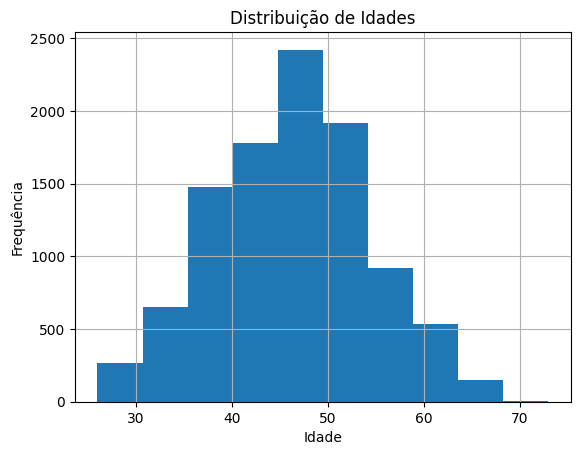

In [ ]:
# Histograma para variáveis numéricas
dados['idade'].hist()
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

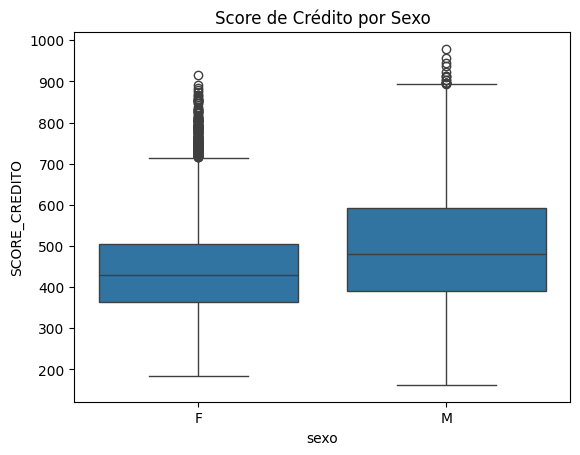

In [ ]:
# Boxplot para variáveis numéricas
sns.boxplot(x='sexo', y='SCORE_CREDITO', data=dados)
plt.title('Score de Crédito por Sexo')
plt.show()

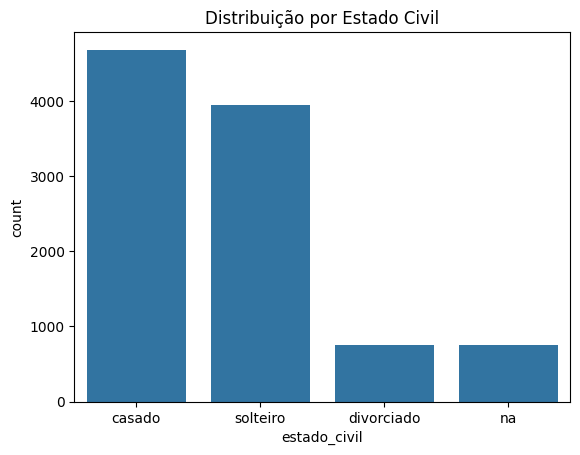

In [ ]:
# Gráfico de barras para variáveis categóricas
sns.countplot(x='estado_civil', data=dados)
plt.title('Distribuição por Estado Civil')
plt.show()

In [ ]:
# Matriz de correlação
print("\nMatriz de correlação:")
# Select only numerical columns for correlation calculation
correlacao = dados.select_dtypes(include=['number']).corr()
print(correlacao)


Matriz de correlação:
                           id     idade  Qte_dependentes  tempo_ultimoservico  \
id                   1.000000  0.007613         0.013596             0.133827   
idade                0.007613  1.000000        -0.070599             0.768790   
Qte_dependentes      0.013596 -0.070599         1.000000            -0.045323   
tempo_ultimoservico  0.133827  0.768790        -0.045323             1.000000   
trabalha             0.015675  0.007030         0.019497             0.029956   
vl_salario_mil       0.026910  0.091667         0.046072             0.134156   
reg_moradia          0.003593 -0.018918        -0.014034            -0.080059   
casa_propria        -0.002270  0.005973         0.167020             0.043788   
vl_imovel_em_mil    -0.002048 -0.028444         0.087397             0.083303   
Qte_cartoes          0.002086 -0.018235        -0.008482             0.046898   
Qte_carros           0.011190  0.047805         0.163993            -0.018213   
SCORE

In [ ]:

# Selecionar as top 5 correlações
top_5_correlacoes = correlacao_abs.drop_duplicates().head(5)
print("\nTop 5 correlações:")
print(top_5_correlacoes)



Top 5 correlações:
idade                tempo_ultimoservico    0.768790
vl_imovel_em_mil     reg_moradia            0.687753
SCORE_CREDITO        vl_imovel_em_mil       0.537342
                     vl_salario_mil         0.413888
tempo_ultimoservico  SCORE_CREDITO          0.383956
dtype: float64


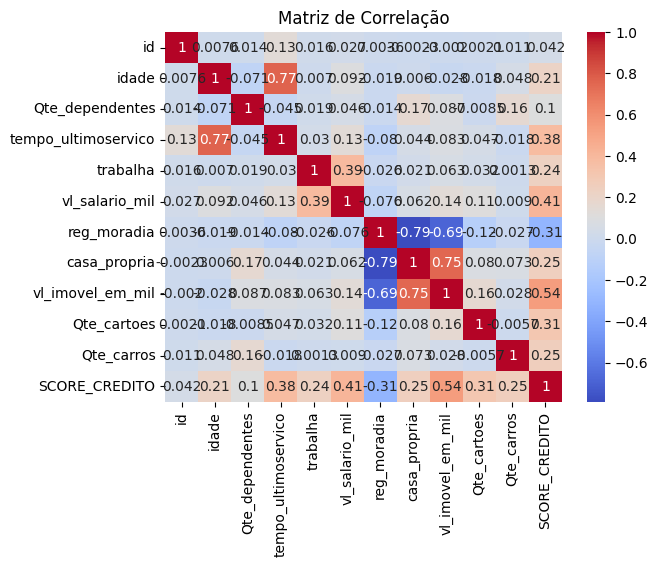

In [ ]:
# Heatmap da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
from getpass import getpass

# Peça o token de acesso pessoal
token = getpass('Digite seu token de acesso pessoal: ')

# Use o token para clonar o repositório
!git clone https://{token}@github.com/leonesso/Credit-Scoring---Fase-1.git
%cd Credit-Scoring---Fase-1


Digite seu token de acesso pessoal: ··········
Cloning into 'Credit-Scoring---Fase-1'...
/content/Credit-Scoring---Fase-1


In [ ]:
# Configure o nome de usuário e e-mail
!git config --global user.email "leonardo.nesso@gmail.com"
!git config --global user.name "Leonardo Nesso"

# Inicialize um novo repositório Git
!git init

# Adicione um arquivo inicial
!echo "Arquivo inicial" > README.md

# Adicione o arquivo ao índice
!git add README.md

# Faça um commit inicial
!git commit -m "Commit inicial"

# Crie a nova branch 'main' e mude para ela
!git branch -M main

# Peça o token de acesso pessoal
from getpass import getpass
token = getpass('Digite seu token de acesso pessoal: ')

# Adicione a origem remota e empurre para o repositório remoto
!git remote add origin https://{token}@github.com/leonesso/Credit-Scoring---Fase-1.git
!git push -u origin main


Reinitialized existing Git repository in /content/Credit-Scoring---Fase-1/.git/
[main (root-commit) 1e5483d] Commit inicial
 1 file changed, 1 insertion(+)
 create mode 100644 README.md
Digite seu token de acesso pessoal: ··········
error: remote origin already exists.
Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Writing objects: 100% (3/3), 235 bytes | 235.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/leonesso/Credit-Scoring---Fase-1.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [ ]:
# Mude para a nova branch 'main'
!git checkout main

error: pathspec 'main' did not match any file(s) known to git
